In [98]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

%matplotlib inline

pd.set_option('display.max_columns', 36)
print(pd.__version__)

0.18.0


In [99]:
import nltk
import string
from nltk import word_tokenize
from nltk.util import bigrams, trigrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

In [16]:
POSITIVE_WORDS = set([line.strip() for line in open('positive-words.txt', 'r')])
NEGATIVE_WORDS = set([line.strip() for line in open('negative-words.txt', 'r')])
NLTK_STOPWORDS = set(stopwords.words('english'))
MORE_STOPWORDS = set([line.strip() for line in open('more_stopwords.txt', 'r')])

def lowercase_remove_punctuation_and_tokenize(s):
    s = s.lower()
    s = s.translate(str.maketrans(dict.fromkeys(string.punctuation, None)))
    # may consider removing arabic-hindu digits
    token_list = nltk.word_tokenize(s)
    exclude_stopwords = lambda token : token not in NLTK_STOPWORDS
    return filter(exclude_stopwords, token_list)

def textProcess(sub_dataframe):
    return lowercase_remove_punctuation_and_tokenize(sub_dataframe)

In [100]:
turbo_csv_filename = os.path.join("./", 'final.csv')
TURBO_DF = pd.read_csv(turbo_csv_filename)


,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count
0,--0HEXd4W6bJI8k7E0RxTA,ZvvTPVqChi-mQd1JV6VM5w,2013-07-13,1.0,0.0,5.0,1.0,"Friendly people, friendly bartenders. good atm...",JL,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,5.000000,4.375,16,2
1,-QTX2UW6PRXnuKRbqJ0soQ,ZvvTPVqChi-mQd1JV6VM5w,2010-09-08,0.0,0.0,5.0,1.0,"Awesome. Was greeted when we came in, the staf...",Clint,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.000000,4.375,16,2
2,4D4UzEOu-QG4-jkyfynhPQ,ZvvTPVqChi-mQd1JV6VM5w,2013-01-03,1.0,2.0,5.0,2.0,Nu towne is the place that my roomies and I ab...,Preston,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.044554,4.375,16,202
3,822zBCq_uB1-I3ncr_oAFg,ZvvTPVqChi-mQd1JV6VM5w,2014-11-11,1.0,0.0,5.0,0.0,This place is the deal great drinks atmosphere...,Beau,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,5.000000,4.375,16,3
4,8qe2c5uRlAkvNFvDriBm1Q,ZvvTPVqChi-mQd1JV6VM5w,2013-12-01,2.0,5.0,5.0,3.0,"The history, the people, the license plates......",Chris,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,2.597403,4.375,16,77


In [101]:
TURBO_DF

,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count
0,--0HEXd4W6bJI8k7E0RxTA,ZvvTPVqChi-mQd1JV6VM5w,2013-07-13,1.0,0.0,5.0,1.0,"Friendly people, friendly bartenders. good atm...",JL,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,5.000000,4.375000,16,2
1,-QTX2UW6PRXnuKRbqJ0soQ,ZvvTPVqChi-mQd1JV6VM5w,2010-09-08,0.0,0.0,5.0,1.0,"Awesome. Was greeted when we came in, the staf...",Clint,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.000000,4.375000,16,2
2,4D4UzEOu-QG4-jkyfynhPQ,ZvvTPVqChi-mQd1JV6VM5w,2013-01-03,1.0,2.0,5.0,2.0,Nu towne is the place that my roomies and I ab...,Preston,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.044554,4.375000,16,202
3,822zBCq_uB1-I3ncr_oAFg,ZvvTPVqChi-mQd1JV6VM5w,2014-11-11,1.0,0.0,5.0,0.0,This place is the deal great drinks atmosphere...,Beau,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,5.000000,4.375000,16,3
4,8qe2c5uRlAkvNFvDriBm1Q,ZvvTPVqChi-mQd1JV6VM5w,2013-12-01,2.0,5.0,5.0,3.0,"The history, the people, the license plates......",Chris,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,2.597403,4.375000,16,77
5,C8ZTiwa7qWoPSMIivTeSfw,ZvvTPVqChi-mQd1JV6VM5w,2008-05-05,8.0,10.0,4.0,8.0,What a perfect location for Nu Towne Saloon. W...,Thomas,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,3.616000,4.375000,16,375
6,GubdNFoDAsiwE6bWIr97cQ,ZvvTPVqChi-mQd1JV6VM5w,2008-05-05,2.0,2.0,5.0,4.0,My review would be from 1973. Everyone was fri...,Michael,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,3.382353,4.375000,16,204
7,VM8ABgfaaNVIBorYFng-Rw,ZvvTPVqChi-mQd1JV6VM5w,2014-03-30,0.0,7.0,1.0,5.0,"LOTS of cock sucking, ass eating and cum swapp...",C,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,1.000000,4.375000,16,2
8,Wyr_WsWFqp9X3Y14tBSGJA,ZvvTPVqChi-mQd1JV6VM5w,2015-01-09,1.0,0.0,5.0,1.0,This is been one of the best bars in town for ...,Troy,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,3.911111,4.375000,16,45
9,ay9H1RpjbBkaiXGxfh7LaA,ZvvTPVqChi-mQd1JV6VM5w,2013-03-26,2.0,6.0,4.0,2.0,Any place that plays Sunshine Day by the Brady...,Kara,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.000000,4.375000,16,14


In [104]:
def randomSample(data, length):
    total_len = len(data)
    frac1 = length / total_len
    #print(frac1)
    sample = data.sample(frac = frac1, replace = True)
    return sample
sample = randomSample(TURBO_DF, 50000)
TURBO_DF = sample
TURBO_DF

,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count
797730,lQsfdmAyQZcYdQD7Xna7Nw,AYF-t7Yge-3mn2StQiEXvg,2013-11-22,0.0,0.0,5.0,0.0,AMAZING!!!!!! Love this place! Everyone should...,Tiffany,"['Bars', 'American (New)', 'Cocktail Bars', 'N...",WILD,150 N Las Vegas Blvd\nSte 120\nDowntown\nLas V...,Las Vegas,NV,business,36.170088,-115.139615,False,full_bar,2.0,5.000000,4.031915,94,1
1831754,SIfJLNMv7vBwo-fSipxNgg,1icf6RttEzz1BMlgAHmJVQ,2010-05-25,1.0,1.0,4.0,1.0,I came here for a friends 21st during my first...,Jonathan,"['Nightlife', 'Dance Clubs']",Lulu,125a George St\nNew Town\nNew Town\nEdinburgh ...,Edinburgh,EDH,business,55.952653,-3.204811,NaN,full_bar,3.0,3.524027,3.266667,15,437
2019581,2-uR7a5losM7P_PAZdws3A,GIqmLJsJYuzwrj7oviJ_KA,2008-07-31,0.0,0.0,4.0,0.0,This is the cutest little place. You instantl...,Rebekah,"['Food', 'Food Delivery Services', 'Event Plan...",La-Tea-Da's Catering,"115 W 7th St\nFourth Ward\nCharlotte, NC 28235",Charlotte,NC,business,35.229990,-80.840621,NaN,NaN,2.0,3.763636,4.083333,12,165
2020983,UTGqubcmDv1cNe5-k8-OeA,IL5WR-5p2vDCyymvytj5Pw,2012-03-06,8.0,20.0,5.0,6.0,"I am what some might refer to as a ""mental mid...",Peter,"['Local Services', 'Computers', 'Shopping', 'M...",Apple Store Shadyside,"5508 Walnut St\nShadyside\nPittsburgh, PA 15232",Pittsburgh,PA,business,40.451050,-79.933330,NaN,NaN,3.0,4.000000,4.000000,32,33
261345,0bZ0kpqHyKIOzsKCn77A4A,nrtQ1MbahiNDSRn5CyA-Sw,2012-01-15,0.0,0.0,5.0,0.0,Love this place. Been here on three trips in t...,Samir,"['Bars', 'Nightlife', 'Lounges']",The Chandelier,The Cosmopolitan of Las Vegas\n3708 Las Vegas ...,Las Vegas,NV,business,36.110084,-115.173179,NaN,full_bar,3.0,3.857143,4.218077,697,7
1916187,nVetqUpX7TXxH6y4Kx2hDA,UlVo_EMmSooxXVLLp9g5RQ,2015-08-17,0.0,0.0,3.0,0.0,I have been on the search for authentic Mexica...,Javier,"['Mexican', 'Restaurants']",Cinco de Mayo,"10009 Weddington Rd Extension\nConcord, NC 28027",Concord,NC,business,35.365432,-80.711154,False,full_bar,1.0,3.000000,3.936170,47,1
1418077,oJeX32x0Cjj9Jcs7_SaUUw,qReegR09yaRiUtX1w2IunA,2008-04-24,0.0,0.0,3.0,2.0,Lucky Strike Lanes is above the average bowlin...,Lisa,"['Active Life', 'Bowling']",Lucky Strike Lanes,Rio All-Suite Hotel & Casino\n3700 W Flamingo ...,Las Vegas,NV,business,36.110413,-115.206701,NaN,NaN,NaN,3.145299,2.800000,10,117
772802,UHAYIYFWh8kVqzqQiEP2Lg,iUPJmJvHy9fVfRxsuwwdLQ,2015-09-20,0.0,0.0,5.0,0.0,My new favorite place! The decor is wonderful ...,Su,"['Korean', 'Japanese', 'Barbeque', 'Restaurants']",Gangnam Asian BBQ Dining,"4480 Paradise Rd\nEastside\nLas Vegas, NV 89169",Las Vegas,NV,business,36.108898,-115.151261,False,beer_and_wine,2.0,4.166667,4.674309,1701,6
989242,XwOZe1gPJZwBxnhAeVIpcg,eXY0FZUUVkXXoXt53cUgAQ,2010-04-18,0.0,0.0,4.0,0.0,Great food and a great price. Always fresh an...,Justin,"['Mexican', 'Restaurants']",Cafe Rio,5765 Centennial Center Blvd\nNorthwest\nLas Ve...,Las Vegas,NV,business,36.264830,-115.257743,False,none,1.0,4.258065,3.468085,94,31
2175598,PBUZMlfi-aY4J5ZTsXtpuw,85yLpEDIn98jbz1SmXDDZA,2015-03-16,0.0,0.0,5.0,0.0,Loving all of my treatments here! Elenir is ve...,Jessica,"['Skin Care', 'Day Spas', 'Laser Hair Removal'...",Silk Skin Laser Spa,"4315 Dean Martin Dr\nSte 230\nLas Vegas, NV 89103",Las Vegas,NV,business,36.112054,-115.181701,NaN,NaN,2.0,5.000000,4.894737,19,2


In [105]:
for idx in range(5):
    print(TURBO_DF.text[idx])
    print

KeyError: 0

In [106]:
initial_features = ['business_id', 'business_name', 'review_stars', 'text']
df_with_initial_features_and_preprocessed_review_text = TURBO_DF[initial_features]
df_with_initial_features_and_preprocessed_review_text['text'] = df_with_initial_features_and_preprocessed_review_text['text'].apply(textProcess)

for idx in range(5):
    print(df_with_initial_features_and_preprocessed_review_text.text.loc[idx])
    print

C:\Software\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


KeyError: 'the label [0] is not in the [index]'

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import *
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score

In [156]:
TEST_SIZE = 0.40
train_X, test_X, train_y, test_y = train_test_split(df_with_initial_features_and_preprocessed_review_text.text,
                                                    df_with_initial_features_and_preprocessed_review_text.review_stars,
                                                    test_size=TEST_SIZE,
                                                    random_state=42)

In [157]:
bag_of_words_vectorizer = CountVectorizer(analyzer = "word",
                                          tokenizer = None,    
                                          preprocessor = None,
                                          ngram_range = (1, 1),
                                          binary = False,
                                          strip_accents='unicode')

binary_vectorizer = CountVectorizer(analyzer = "word",
                                    tokenizer = None,    
                                    preprocessor = None,
                                    ngram_range = (1, 1),
                                    binary = True,
                                    strip_accents='unicode')

bigram_vectorizer = CountVectorizer(analyzer = "word",
                                    tokenizer = None,
                                    preprocessor = None,
                                    ngram_range = (2, 2),
                                    strip_accents='unicode')

trigram_vectorizer = CountVectorizer(analyzer = "word",
                                     tokenizer = None,
                                     preprocessor = None,
                                     ngram_range = (3, 3),
                                     strip_accents='unicode')

bi_and_trigram_vectorizer = CountVectorizer(analyzer = "word",
                                            tokenizer = None,
                                            preprocessor = None,
                                            ngram_range = (2,3),
                                            strip_accents='unicode')

random_forest_vectorizer = CountVectorizer(analyzer = "word",
                                           tokenizer = None,
                                           preprocessor = None,
                                           ngram_range = (1,1),
                                           strip_accents = 'unicode',
                                           max_features = 1000)

In [106]:
bow_feature_matrix_train = bag_of_words_vectorizer.fit_transform(train_X)
bow_feature_matrix_test = bag_of_words_vectorizer.transform(test_X)
bow_feature_matrix_train, bow_feature_matrix_test

(<1200x6245 sparse matrix of type '<class 'numpy.int64'>'
 	with 46475 stored elements in Compressed Sparse Row format>,
 <801x6245 sparse matrix of type '<class 'numpy.int64'>'
 	with 27861 stored elements in Compressed Sparse Row format>)

In [107]:
multinomial_nb_classifier = MultinomialNB()
multinomial_nb_classifier.fit(bow_feature_matrix_train, train_y)
multinomial_nb_prediction = multinomial_nb_classifier.predict(bow_feature_matrix_test)

In [108]:
def make_confusion_matrix_relative(confusion_matrix):
    star_category_classes = [1, 2, 3, 4, 5]
    N = list(map(lambda clazz : sum(test_y == clazz), star_category_classes))
    relative_confusion_matrix = np.empty((len(star_category_classes), len(star_category_classes)))
    
    for j in range(0, len(star_category_classes)):
        if N[j] > 0:
            relative_frequency = confusion_matrix[j, :] / float(N[j])
            relative_confusion_matrix[j, :] = relative_frequency
            
    return relative_confusion_matrix

# http://www.wenda.io/questions/4330313/heatmap-with-text-in-each-cell-with-matplotlibs-pyplot.html
# http://stackoverflow.com/questions/20520246/create-heatmap-using-pandas-timeseries
# http://sebastianraschka.com/Articles/heatmaps_in_r.html
# http://code.activestate.com/recipes/578175-hierarchical-clustering-heatmap-python/
def plot_confusion_matrix(confusion_matrix=[[]], title='CM', savefilename=''):
    rcm = make_confusion_matrix_relative(confusion_matrix)
    #plt.imshow(rcm, vmin=0, vmax=1, interpolation='nearest')
    c = plt.pcolor(rcm, edgecolors='k', linewidths=4, cmap='jet', vmin=0.0, vmax=1.0)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.xticks(0.5 + np.arange(5), np.arange(1,6))
    plt.yticks(0.5 + np.arange(5), np.arange(1,6))

    def show_values(pc, fmt="%.2f", **kw):
        pc.update_scalarmappable()
        ax = pc.get_axes()
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if sum(color[:2] > 0.3) >= 2:
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)
    
    show_values(c)

    if savefilename:
        plt.savefig(savefilename, bbox_inches='tight')
    
    return plt.show()

[[ 0.10416667  0.0625      0.1875      0.41666667  0.22916667]
 [ 0.          0.0625      0.171875    0.421875    0.34375   ]
 [ 0.          0.0106383   0.22340426  0.46808511  0.29787234]
 [ 0.          0.          0.08085106  0.37446809  0.54468085]
 [ 0.          0.00277778  0.01388889  0.13333333  0.85      ]]


C:\Software\Anaconda3\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


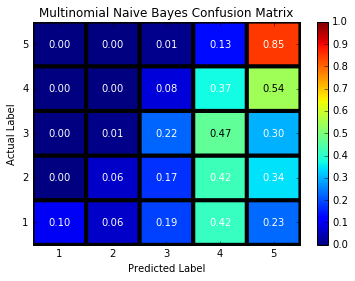

In [109]:
multinomial_confusion_matrix = confusion_matrix(test_y, multinomial_nb_prediction)
print(make_confusion_matrix_relative(multinomial_confusion_matrix))
plot_confusion_matrix(multinomial_confusion_matrix,'Multinomial Naive Bayes Confusion Matrix', savefilename='MultinomialCM.png')

In [110]:
def print_classifier_performance_metrics(name, predictions):
    target_names = ['1 star', '2 star', '3 star', '4 star', '5 star']
    
    print("MODEL: %s" % name)
    print()

    print('Precision: ' + str(metrics.precision_score(test_y, predictions))) 
    print('Recall: ' + str(metrics.recall_score(test_y, predictions))) 
    print('F1: ' + str(metrics.f1_score(test_y, predictions)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_y, predictions)))

    print()
    print('Classification Report:') 
    print(classification_report(test_y, predictions, target_names=target_names)) 
    
    print()
    print('Precision variance: %f' % np.var(precision_score(test_y, predictions, average=None), ddof=len(target_names)-1)) 
    
    print()
    print('Recall variance: %f' % np.var(recall_score(test_y, predictions, average=None), ddof=len(target_names)-1)) 

In [111]:
print_classifier_performance_metrics('Multinomial Naive Bayes', multinomial_nb_prediction)

MODEL: Multinomial Naive Bayes

Precision: 0.524919414913
Recall: 0.529338327091
F1: 0.484529976446
Accuracy: 0.529338327091

Classification Report:
             precision    recall  f1-score   support

     1 star       1.00      0.10      0.19        48
     2 star       0.44      0.06      0.11        64
     3 star       0.32      0.22      0.26        94
     4 star       0.39      0.37      0.38       235
     5 star       0.62      0.85      0.72       360

avg / total       0.52      0.53      0.48       801


Precision variance: 0.296028

Recall variance: 0.406046


C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sam

In [112]:
bernoulli_feature_matrix_train = binary_vectorizer.fit_transform(train_X)
bernoulli_feature_matrix_test = binary_vectorizer.transform(test_X)
bernoulli_feature_matrix_train, bernoulli_feature_matrix_test

(<1200x6245 sparse matrix of type '<class 'numpy.int64'>'
 	with 46475 stored elements in Compressed Sparse Row format>,
 <801x6245 sparse matrix of type '<class 'numpy.int64'>'
 	with 27861 stored elements in Compressed Sparse Row format>)

In [113]:
bernoulli_nb_classifier = BernoulliNB().fit(bernoulli_feature_matrix_train, train_y)
bernoulli_nb_prediction = bernoulli_nb_classifier.predict(bernoulli_feature_matrix_test)

C:\Software\Anaconda3\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


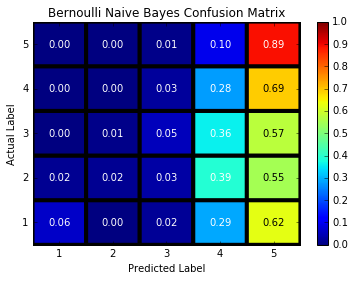

In [114]:
bernoulli_confusion_matrix = confusion_matrix(test_y, bernoulli_nb_prediction)
plot_confusion_matrix(bernoulli_confusion_matrix, 'Bernoulli Naive Bayes Confusion Matrix', savefilename='BernoulliCM.png')

In [115]:
print_classifier_performance_metrics('Bernoulli Naive Bayes', bernoulli_nb_prediction)

MODEL: Bernoulli Naive Bayes

Precision: 0.4566293561
Recall: 0.494382022472
F1: 0.414183393946
Accuracy: 0.494382022472

Classification Report:
             precision    recall  f1-score   support

     1 star       0.75      0.06      0.12        48
     2 star       0.33      0.02      0.03        64
     3 star       0.29      0.05      0.09        94
     4 star       0.38      0.28      0.32       235
     5 star       0.53      0.89      0.67       360

avg / total       0.46      0.49      0.41       801


Precision variance: 0.139381

Recall variance: 0.540930


C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sam

In [116]:
bigram_multinomial_feature_matrix_train = bigram_vectorizer.fit_transform(train_X)
bigram_multinomial_feature_matrix_test = bigram_vectorizer.transform(test_X)
bigram_multinomial_feature_matrix_train, bigram_multinomial_feature_matrix_test

(<1200x41042 sparse matrix of type '<class 'numpy.int64'>'
 	with 53447 stored elements in Compressed Sparse Row format>,
 <801x41042 sparse matrix of type '<class 'numpy.int64'>'
 	with 11585 stored elements in Compressed Sparse Row format>)

In [117]:
bigram_multinomial_nb_classifier = MultinomialNB().fit(bigram_multinomial_feature_matrix_train, train_y)
bigram_multinomial_nb_prediction = bigram_multinomial_nb_classifier.predict(bigram_multinomial_feature_matrix_test)

C:\Software\Anaconda3\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


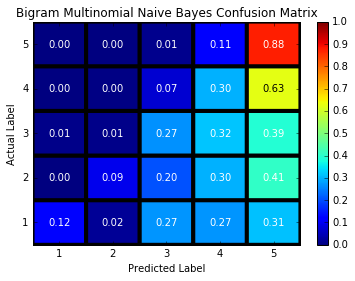

In [118]:
bigram_multinomial_confusion_matrix = confusion_matrix(test_y, bigram_multinomial_nb_prediction)
plot_confusion_matrix(bigram_multinomial_confusion_matrix, 'Bigram Multinomial Naive Bayes Confusion Matrix', savefilename='BigramMultinomialCM.png')

In [119]:
print_classifier_performance_metrics('Bigram Multinomial Naive Bayes', bigram_multinomial_nb_prediction)

MODEL: Bigram Multinomial Naive Bayes

Precision: 0.526393058071
Recall: 0.52684144819
F1: 0.476869374068
Accuracy: 0.52684144819

Classification Report:
             precision    recall  f1-score   support

     1 star       0.86      0.12      0.22        48
     2 star       0.67      0.09      0.16        64
     3 star       0.34      0.27      0.30        94
     4 star       0.41      0.30      0.34       235
     5 star       0.58      0.88      0.70       360

avg / total       0.53      0.53      0.48       801


Precision variance: 0.170313

Recall variance: 0.399986


C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sam

In [120]:
trigram_multinomial_feature_matrix_train = trigram_vectorizer.fit_transform(train_X)
trigram_multinomial_feature_matrix_test = trigram_vectorizer.transform(test_X)
trigram_multinomial_feature_matrix_train, trigram_multinomial_feature_matrix_test

(<1200x51327 sparse matrix of type '<class 'numpy.int64'>'
 	with 53087 stored elements in Compressed Sparse Row format>,
 <801x51327 sparse matrix of type '<class 'numpy.int64'>'
 	with 1886 stored elements in Compressed Sparse Row format>)

In [121]:
tri_gram_multinomial_nb_classifier = MultinomialNB().fit(trigram_multinomial_feature_matrix_train, train_y)
tri_gram_multinomial_nb_prediction = tri_gram_multinomial_nb_classifier.predict(trigram_multinomial_feature_matrix_test)

C:\Software\Anaconda3\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


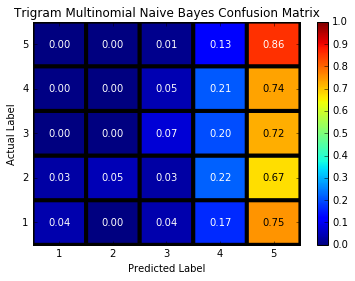

In [122]:
trigram_multinomial_confusion_matrix = confusion_matrix(test_y, tri_gram_multinomial_nb_prediction)
plot_confusion_matrix(trigram_multinomial_confusion_matrix, 'Trigram Multinomial Naive Bayes Confusion Matrix', savefilename='TrigramMultinomialCM.png')

In [123]:
print_classifier_performance_metrics('Trigram Multinomial Naive Bayes', tri_gram_multinomial_nb_prediction)

MODEL: Trigram Multinomial Naive Bayes

Precision: 0.462158476894
Recall: 0.463171036205
F1: 0.384964494827
Accuracy: 0.463171036205

Classification Report:
             precision    recall  f1-score   support

     1 star       0.40      0.04      0.08        48
     2 star       1.00      0.05      0.09        64
     3 star       0.26      0.07      0.12        94
     4 star       0.36      0.21      0.27       235
     5 star       0.49      0.86      0.62       360

avg / total       0.46      0.46      0.38       801


Precision variance: 0.336219

Recall variance: 0.486879


C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sam

In [124]:
forest100 = RandomForestClassifier(n_estimators = 100, random_state=42)

In [125]:
random_forest_feature_matrix_train = random_forest_vectorizer.fit_transform(train_X)
random_forest_feature_matrix_test = random_forest_vectorizer.transform(test_X)

In [126]:
%time forest100.fit(random_forest_feature_matrix_train.toarray(), train_y)
forest100_pred = forest100.predict(random_forest_feature_matrix_test.toarray())
np.save('forest100pred', forest100_pred)

Wall time: 871 ms


C:\Software\Anaconda3\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


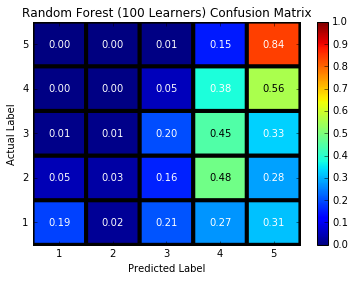

In [127]:
random_forest_confusion_matrix = confusion_matrix(test_y, forest100_pred)
plot_confusion_matrix(random_forest_confusion_matrix, 'Random Forest (100 Learners) Confusion Matrix',savefilename='RandomForestCM.png')

In [128]:
print_classifier_performance_metrics('Random Forest (100 Learners)', forest100_pred)

MODEL: Random Forest (100 Learners)

Precision: 0.495482216873
Recall: 0.52808988764
F1: 0.483302650009
Accuracy: 0.52808988764

Classification Report:
             precision    recall  f1-score   support

     1 star       0.64      0.19      0.29        48
     2 star       0.33      0.03      0.06        64
     3 star       0.36      0.20      0.26        94
     4 star       0.39      0.38      0.39       235
     5 star       0.61      0.84      0.71       360

avg / total       0.50      0.53      0.48       801


Precision variance: 0.086300

Recall variance: 0.390515


C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sam

In [129]:
svc_feature_matrix_train = random_forest_feature_matrix_train
svc_feature_matrix_test = random_forest_feature_matrix_test
svc = SVC()

In [130]:
%time svc.fit(svc_feature_matrix_train, train_y) 

Wall time: 585 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [131]:
%time svc_predictions = svc.predict(svc_feature_matrix_test)
np.save('svcPred', svc_predictions)

Wall time: 288 ms


In [132]:
if os.path.isfile('svcPred.npy'):
    svc_predictions = np.load('svcPred.npy')

C:\Software\Anaconda3\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


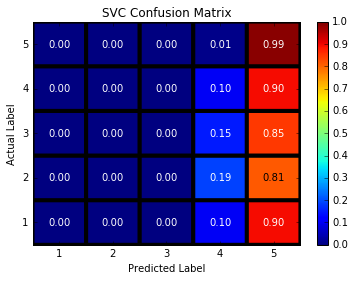

In [133]:
svc_confusion_matrix = confusion_matrix(test_y, svc_predictions)
plot_confusion_matrix(svc_confusion_matrix, 'SVC Confusion Matrix', savefilename='SVC_CM.png')

In [134]:
print_classifier_performance_metrics('SVC', svc_predictions)

MODEL: SVC

Precision: 0.33497577067
Recall: 0.474406991261
F1: 0.338280434763
Accuracy: 0.474406991261

Classification Report:
             precision    recall  f1-score   support

     1 star       0.00      0.00      0.00        48
     2 star       0.00      0.00      0.00        64
     3 star       0.00      0.00      0.00        94
     4 star       0.41      0.10      0.16       235
     5 star       0.48      0.99      0.65       360

avg / total       0.33      0.47      0.34       801


Precision variance: 0.238464

Recall variance: 0.750268


C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None 

In [135]:
bi_and_trigram_multinomial_feature_matrix_train = bi_and_trigram_vectorizer.fit_transform(train_X)
bi_and_trigram_multinomial_feature_matrix_test = bi_and_trigram_vectorizer.transform(test_X)
bi_and_trigram_multinomial_feature_matrix_train, bi_and_trigram_multinomial_feature_matrix_test

(<1200x92369 sparse matrix of type '<class 'numpy.int64'>'
 	with 106534 stored elements in Compressed Sparse Row format>,
 <801x92369 sparse matrix of type '<class 'numpy.int64'>'
 	with 13471 stored elements in Compressed Sparse Row format>)

In [136]:
bi_and_tri_gram_multinomial_nb_classifier = MultinomialNB().fit(bi_and_trigram_multinomial_feature_matrix_train, train_y)
bi_and_tri_gram_multinomial_nb_prediction = bi_and_tri_gram_multinomial_nb_classifier.predict\
(bi_and_trigram_multinomial_feature_matrix_test)

C:\Software\Anaconda3\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


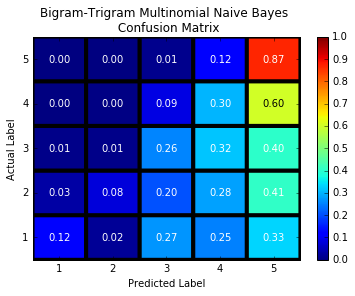

In [137]:
bi_and_tri_gram_multinomial_confusion_matrix = confusion_matrix(test_y, bi_and_tri_gram_multinomial_nb_prediction)
plot_confusion_matrix(bi_and_tri_gram_multinomial_confusion_matrix,
                      'Bigram-Trigram Multinomial Naive Bayes \n Confusion Matrix', savefilename='BiAndTrigramMultinomialCM.png')

In [138]:
print_classifier_performance_metrics('Bi-and-Trigram Multinomial Naive Bayes', bi_and_tri_gram_multinomial_nb_prediction)

MODEL: Bi-and-Trigram Multinomial Naive Bayes

Precision: 0.5102947811
Recall: 0.523096129838
F1: 0.473312642803
Accuracy: 0.523096129838

Classification Report:
             precision    recall  f1-score   support

     1 star       0.67      0.12      0.21        48
     2 star       0.62      0.08      0.14        64
     3 star       0.32      0.26      0.28        94
     4 star       0.41      0.30      0.35       235
     5 star       0.59      0.87      0.70       360

avg / total       0.51      0.52      0.47       801


Precision variance: 0.090479

Recall variance: 0.402741


C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sam

In [158]:
from operator import itemgetter
from functools import reduce

def argmax(dictionary):
    return (max(dictionary.items(), key=itemgetter(1)))[0]

class Multinomial_NB_Classifier():
    
    def train(self, class_labels, documents, class_priors=[], complement=False):       
        Classes = sorted(list(set(class_labels)))
        Vocabulary = reduce(lambda V, d : V.union(set(d.split())), documents, set())
        
        if len(class_priors) != len(Classes):
            N_documents_per_class = lambda c : sum(c == np.array(class_labels))
            N_documents = len(documents)
            class_priors = {c : N_documents_per_class(c) / float(N_documents) for c in Classes}
        
        Text_given_class = {c : documents[c == np.array(class_labels)].sum() for c in Classes}
        length_of_concatenated_documents_of_class = {c : len(Text_given_class[c].split()) for c in Classes}
        total_length_of_concatenated_documents_of_all_classes = sum([length_of_concatenated_documents_of_class[C] for C in Classes])
        
        absolute_frequency_vectorizer = CountVectorizer(analyzer = "word",
                                                        vocabulary = Vocabulary,
                                                        ngram_range = (1, 1),
                                                        binary = False)
        documentclass_termunigram_matrix = absolute_frequency_vectorizer.fit_transform(Text_given_class.values())
    
        number_of_feature_words = documentclass_termunigram_matrix.shape[1]
        feature_word_index = dict(zip(absolute_frequency_vectorizer.get_feature_names(), range(number_of_feature_words)))
        word_counts_irregardless_of_class = documentclass_termunigram_matrix.sum(axis=0)
        
        WORD_GIVEN_CLASS_CPT = {}
        COMPLEMENT_WORD_GIVEN_CLASS_CPT = {}
        K = len(Vocabulary)
        
        for class_idx, c in enumerate(Classes):
            if c not in WORD_GIVEN_CLASS_CPT:
                WORD_GIVEN_CLASS_CPT[c] = {}
                COMPLEMENT_WORD_GIVEN_CLASS_CPT[c] = {}

            for w in Vocabulary:
                T_wc = documentclass_termunigram_matrix[class_idx, feature_word_index[w]]
                WORD_GIVEN_CLASS_CPT[c][w] = float(1 + T_wc) / (K + length_of_concatenated_documents_of_class[c])
                
                C_wc = word_counts_irregardless_of_class[0, feature_word_index[w]] - T_wc
                complement_classes_wc = total_length_of_concatenated_documents_of_all_classes-length_of_concatenated_documents_of_class[c]
                COMPLEMENT_WORD_GIVEN_CLASS_CPT[c][w] = float(1 + C_wc) / (K + complement_classes_wc)
           
        self.classes = Classes
        self.vocabulary = Vocabulary
        self.class_priors = class_priors
        self.words_cpt = WORD_GIVEN_CLASS_CPT
        
        if complement:
            self.complement = True
            self.complement_cpt = COMPLEMENT_WORD_GIVEN_CLASS_CPT
        else:
            self.complement = False
            
        return self

    def predict(self, documents):
        target_labels = []
        
        for d in documents:
            score = {}
            Words_d = set(d.split())
            
            for class_idx, c in enumerate(self.classes):
                word_log_likelihoods = np.log([self.words_cpt[c][w] for w in Words_d if w in self.vocabulary])
                score[c] = np.log(self.class_priors[c])
                
                if self.complement:
                    word_in_complement_classes_log_likelihoods = np.log([self.complement_cpt[c][w] for w in Words_d if w in self.vocabulary])
                    score[c] -= sum(word_in_complement_classes_log_likelihoods)
                else:
                    score[c] += sum(word_log_likelihoods)
                    
            c_map = argmax(score)
            target_labels.append(c_map)
            
        return target_labels    

In [140]:
%time clf = Multinomial_NB_Classifier().train(class_labels=train_y, documents=train_X, complement=True)

Wall time: 1.73 s


In [141]:
%time pre = clf.predict(test_X)

Wall time: 306 ms


C:\Software\Anaconda3\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


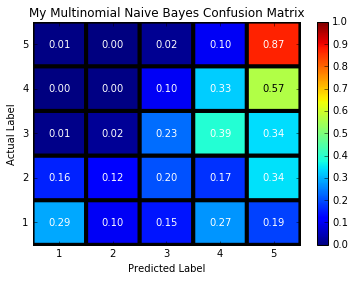

In [142]:
my_multinomial_confusion_matrix = confusion_matrix(test_y, pre)
plot_confusion_matrix(my_multinomial_confusion_matrix,'My Multinomial Naive Bayes Confusion Matrix', savefilename='MyMultinomialCM.png')

In [143]:
print_classifier_performance_metrics('My Multinomial Naive Bayes', pre)

MODEL: My Multinomial Naive Bayes

Precision: 0.512190655226
Recall: 0.543071161049
F1: 0.503891171928
Accuracy: 0.543071161049

Classification Report:
             precision    recall  f1-score   support

     1 star       0.52      0.29      0.37        48
     2 star       0.50      0.12      0.20        64
     3 star       0.30      0.23      0.26        94
     4 star       0.44      0.33      0.38       235
     5 star       0.62      0.87      0.72       360

avg / total       0.51      0.54      0.50       801


Precision variance: 0.053684

Recall variance: 0.338665


C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sam

In [ ]:
# Using positive and negative word for ML 




In [97]:
turbo_csv_filename = os.path.join("./", 'final.csv')
TURBO_DF = pd.read_csv(turbo_csv_filename)
TURBO_DF.head()

KeyboardInterrupt: 

In [113]:
TURBO_DF['text']

0          Friendly people, friendly bartenders. good atm...
1          Awesome. Was greeted when we came in, the staf...
2          Nu towne is the place that my roomies and I ab...
3          This place is the deal great drinks atmosphere...
4          The history, the people, the license plates......
5          What a perfect location for Nu Towne Saloon. W...
6          My review would be from 1973. Everyone was fri...
7          LOTS of cock sucking, ass eating and cum swapp...
8          This is been one of the best bars in town for ...
9          Any place that plays Sunshine Day by the Brady...
10         So I just moved to town. I was told to go to N...
11         Wow why had I never been here before ! The old...
12         I love you, NuTowne! The dirt lot. The endless...
13         My first apartment in Phx was at Van Buren and...
14         What a refreshing alternative to Charlie's. So...
15         Truely one of Americas greatest gay bars!!! Ye...
16         When in Phoen

In [114]:
TURBO_DF

,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count
0,--0HEXd4W6bJI8k7E0RxTA,ZvvTPVqChi-mQd1JV6VM5w,2013-07-13,1.0,0.0,5.0,1.0,"Friendly people, friendly bartenders. good atm...",JL,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,5.000000,4.375000,16,2
1,-QTX2UW6PRXnuKRbqJ0soQ,ZvvTPVqChi-mQd1JV6VM5w,2010-09-08,0.0,0.0,5.0,1.0,"Awesome. Was greeted when we came in, the staf...",Clint,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.000000,4.375000,16,2
2,4D4UzEOu-QG4-jkyfynhPQ,ZvvTPVqChi-mQd1JV6VM5w,2013-01-03,1.0,2.0,5.0,2.0,Nu towne is the place that my roomies and I ab...,Preston,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.044554,4.375000,16,202
3,822zBCq_uB1-I3ncr_oAFg,ZvvTPVqChi-mQd1JV6VM5w,2014-11-11,1.0,0.0,5.0,0.0,This place is the deal great drinks atmosphere...,Beau,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,5.000000,4.375000,16,3
4,8qe2c5uRlAkvNFvDriBm1Q,ZvvTPVqChi-mQd1JV6VM5w,2013-12-01,2.0,5.0,5.0,3.0,"The history, the people, the license plates......",Chris,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,2.597403,4.375000,16,77
5,C8ZTiwa7qWoPSMIivTeSfw,ZvvTPVqChi-mQd1JV6VM5w,2008-05-05,8.0,10.0,4.0,8.0,What a perfect location for Nu Towne Saloon. W...,Thomas,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,3.616000,4.375000,16,375
6,GubdNFoDAsiwE6bWIr97cQ,ZvvTPVqChi-mQd1JV6VM5w,2008-05-05,2.0,2.0,5.0,4.0,My review would be from 1973. Everyone was fri...,Michael,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,3.382353,4.375000,16,204
7,VM8ABgfaaNVIBorYFng-Rw,ZvvTPVqChi-mQd1JV6VM5w,2014-03-30,0.0,7.0,1.0,5.0,"LOTS of cock sucking, ass eating and cum swapp...",C,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,1.000000,4.375000,16,2
8,Wyr_WsWFqp9X3Y14tBSGJA,ZvvTPVqChi-mQd1JV6VM5w,2015-01-09,1.0,0.0,5.0,1.0,This is been one of the best bars in town for ...,Troy,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,3.911111,4.375000,16,45
9,ay9H1RpjbBkaiXGxfh7LaA,ZvvTPVqChi-mQd1JV6VM5w,2013-03-26,2.0,6.0,4.0,2.0,Any place that plays Sunshine Day by the Brady...,Kara,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.000000,4.375000,16,14


In [62]:
TURBO_DF = TURBO_DF[TURBO_DF['user_review_count'] >= 50]
TURBO_DF = TURBO_DF[TURBO_DF['business_review_count'] >= 50]

In [143]:
import random
import pandas
import numpy as np
rows = np.random.choice(temp.index, 3)

NameError: name 'rows' is not defined

In [12]:
temp

,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count
84,C8ZTiwa7qWoPSMIivTeSfw,cVejKU_SrdbvzIbQ4oPV0A,2007-06-29,13.0,12.0,4.0,13.0,Mi Patio es su patio. While there actually is ...,Thomas,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.616000,3.869697,330,375
85,nbofxFWHORebBHh10OgYLA,cVejKU_SrdbvzIbQ4oPV0A,2011-09-25,3.0,1.0,4.0,2.0,YUM YUM YUM YUM YUM.\nFriends in town from Ohi...,Christopher,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.918239,3.869697,330,159
86,100Df1wcVrl9rJgB7EG6xw,cVejKU_SrdbvzIbQ4oPV0A,2011-08-10,0.0,0.0,3.0,0.0,Oh Mi Patio! I do have to say that this place ...,Daniel,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.541353,3.869697,330,133
88,cRyNICH0mhjxagvSyVr60Q,cVejKU_SrdbvzIbQ4oPV0A,2012-04-02,6.0,4.0,4.0,6.0,Living just a half mile away for the past few ...,Jon,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.882353,3.869697,330,187
89,9SZBVZ-mxebOVa1BlWFtWw,cVejKU_SrdbvzIbQ4oPV0A,2012-07-02,0.0,0.0,4.0,0.0,Fast service...decent food. Reasonable prices....,Jill,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.674267,3.869697,330,307
90,lPaYMDmJbAnv_3pmZH_inw,cVejKU_SrdbvzIbQ4oPV0A,2009-05-02,17.0,18.0,4.0,16.0,"I have a simple life, big and small, soft and ...",Alexander,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.437008,3.869697,330,508
91,Hi7VohxSS5OBt98w4j8t4A,cVejKU_SrdbvzIbQ4oPV0A,2011-08-05,0.0,0.0,4.0,1.0,I really like Mi Patio. I wish it were closer ...,Vegegirly,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.732240,3.869697,330,183
92,kffxYQVQsEpF1DVlQlcGCg,cVejKU_SrdbvzIbQ4oPV0A,2012-12-26,4.0,3.0,3.0,5.0,"I am going to have to say, I just do not know ...",Mario,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,4.315634,3.869697,330,339
93,E5qFR0RBQBoXx8FbrOkdbw,cVejKU_SrdbvzIbQ4oPV0A,2012-10-12,1.0,0.0,4.0,0.0,Pretty good food. Mexican is hit or miss in t...,Mya,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.788194,3.869697,330,288
94,W_QXYA7A0IhMrvbckz7eVg,cVejKU_SrdbvzIbQ4oPV0A,2009-03-05,1.0,1.0,1.0,1.0,"I really hated this place. Granted, I am not ...",Bri,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.605505,3.869697,330,327


In [173]:
def randomSample(data, length):
    #total_len = len(data)
    #frac1 = length / total_len
    #print(frac1)
    sample = data.sample(frac = length, replace = True)
    return sample

In [145]:
sample = randomSample(temp, 5)

In [146]:
sample

,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count
94,W_QXYA7A0IhMrvbckz7eVg,cVejKU_SrdbvzIbQ4oPV0A,2009-03-05,1.0,1.0,1.0,1.0,"I really hated this place. Granted, I am not ...",Bri,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.605505,3.869697,330,327
91,Hi7VohxSS5OBt98w4j8t4A,cVejKU_SrdbvzIbQ4oPV0A,2011-08-05,0.0,0.0,4.0,1.0,I really like Mi Patio. I wish it were closer ...,Vegegirly,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.732240,3.869697,330,183
85,nbofxFWHORebBHh10OgYLA,cVejKU_SrdbvzIbQ4oPV0A,2011-09-25,3.0,1.0,4.0,2.0,YUM YUM YUM YUM YUM.\nFriends in town from Ohi...,Christopher,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.918239,3.869697,330,159
85,nbofxFWHORebBHh10OgYLA,cVejKU_SrdbvzIbQ4oPV0A,2011-09-25,3.0,1.0,4.0,2.0,YUM YUM YUM YUM YUM.\nFriends in town from Ohi...,Christopher,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.918239,3.869697,330,159
92,kffxYQVQsEpF1DVlQlcGCg,cVejKU_SrdbvzIbQ4oPV0A,2012-12-26,4.0,3.0,3.0,5.0,"I am going to have to say, I just do not know ...",Mario,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,4.315634,3.869697,330,339


In [ ]:
sample = temp.sample(frac = 0.3, replace = True)



In [170]:
business_average_star = TURBO_DF.groupby(['business_id']).mean()
star_category_absolute_frequencies2 = (business_average_star.business_average_stars).round().value_counts()
good_business = TURBO_DF[TURBO_DF['business_average_stars'] >= 4.10]
average_business = TURBO_DF[TURBO_DF['business_average_stars'] >= 3.2]
average_business =average_business[average_business['business_average_stars'] <= 3.5]
bad_business = TURBO_DF[TURBO_DF['business_average_stars'] <= 2.5]

In [69]:
business_average_star = TURBO_DF.groupby(['business_id']).mean()
star_category_absolute_frequencies2 = (business_average_star.business_average_stars).round().value_counts()
good_business = TURBO_DF[TURBO_DF['business_average_stars'] >= 4.10]
average_business = TURBO_DF[TURBO_DF['business_average_stars'] >= 3.2]
average_business =average_business[average_business['business_average_stars'] <= 3.5]
bad_business = TURBO_DF[TURBO_DF['business_average_stars'] <= 2.5]

user_average_star = TURBO_DF.groupby(['user_id']).mean()
star_category_absolute_frequencies3 = (user_average_star.user_average_stars).round().value_counts(ascending=True)
good_user = TURBO_DF[TURBO_DF['user_average_stars'] >= 4.0]
#good_user = TURBO_DF[TURBO_DF['user_average_stars'] <= 4.8]
average_user = TURBO_DF[TURBO_DF['user_average_stars'] >= 3.1]
average_user =average_user[average_user['user_average_stars'] <= 3.5]
bad_user = TURBO_DF[TURBO_DF['user_average_stars'] <= 3]
bad_user = bad_user[bad_user['user_average_stars'] >= 0]



def tableJoin(user, good, average, bad):
    cols_to_use = ['user_id','business_id','date']
    goodgood = pd.merge(user, good[cols_to_use], how='inner')
    goodaverage = pd.merge(user, average[cols_to_use], how='inner')
    goodbad = pd.merge(user, bad[cols_to_use], how='inner')
    return goodgood, goodaverage, goodbad

goodbusiness, averbusiness, badbusiness = tableJoin(good_user, good_business, average_business, bad_business)
avergood, averaver, averbad = tableJoin(average_user, good_business, average_business, bad_business)
badgood, badaver, badbad = tableJoin(bad_user, good_business, average_business, bad_business)
goodgood, goodaver, goodbad = tableJoin(good_user, good_business, average_business, bad_business)

def Concat(good, aver, bad):
    frames = [good, aver, bad]
    together = pd.concat(frames)
    return together

user_good = Concat(goodgood, goodaver, goodbad)
user_aver = Concat(avergood, averaver, averbad)
user_bad = Concat(badgood, badaver, badbad)


def ChangeAverage(data, value):
    data['BP_average_stars'] = value
    return data

user_good = ChangeAverage(user_good, 4.357)
user_aver = ChangeAverage(user_aver, 3.27)
user_bad = ChangeAverage(user_bad,1.699)

#user_all = Concat(user_good,user_aver,user_bad)
#frames = [user_good,user_bad]
frames = [user_good]
user_all = pd.concat(frames)

POSITIVE_WORDS = set([line.strip() for line in open('positive-words.txt', 'r')])
NEGATIVE_WORDS = set([line.strip() for line in open('negative-words.txt', 'r')])
NLTK_STOPWORDS = set(stopwords.words('english'))
MORE_STOPWORDS = set([line.strip() for line in open('more_stopwords.txt', 'r')])

def textProcess(s):
    s = s.lower()
    #print(s)
    s = s.translate(str.maketrans(dict.fromkeys(string.punctuation, None)))
    # may consider removing arabic-hindu digits
    token_list = nltk.word_tokenize(s)
    #print(token_list)
    #return token_list
    exclude_stopwords = lambda token : token not in NLTK_STOPWORDS
    return list(filter(exclude_stopwords, token_list))

import json
from collections import OrderedDict

def count_number_of_positive_words(document):
    return len(list((filter(lambda tok : tok in POSITIVE_WORDS, document))))

def count_number_of_negative_words(document):
    return len(list((filter(lambda tok : tok in NEGATIVE_WORDS, document))))


user_all['text'] = user_all['text'].apply(textProcess)
user_all['positive_words_count'] = user_all.text.apply(count_number_of_positive_words)
user_all['negative_words_count'] = user_all.text.apply(count_number_of_negative_words)
#final_DF['neutral_words_count'] = final_DF.review_length - (df_with_refeature_engineered.positive_words_count + df_with_refeature_engineered.negative_words_count)
user_all['all_sentiment_words_count'] = user_all['positive_words_count'] + user_all['negative_words_count']

user_all['positive'] = (user_all['positive_words_count'] * 1.0)/ (user_all['all_sentiment_words_count'] * 1.0)
user_all['negative'] = (user_all['negative_words_count'] * 1.0)/ (user_all['all_sentiment_words_count'] * 1.0)
user_all['ratio'] = (user_all['positive_words_count'] * 1.0)/ (user_all['negative_words_count'] * 1.0)
user_all['positive'] = user_all['positive'] = user_all['positive'].fillna(2)
user_all = user_all.drop(user_all[user_all.positive ==2].index)
user_all['average_diff'] = (user_all['BP_average_stars'] * 1.0) - (user_all['user_average_stars'] * 1.0)
user_all['average_diff_ratio'] = (user_all['average_diff'] * 1.0) / 5
user_all = user_all.replace('inf', 999)
user_all

,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count,BP_average_stars,positive_words_count,negative_words_count,all_sentiment_words_count,positive,negative,ratio,average_diff,average_diff_ratio
0,4D4UzEOu-QG4-jkyfynhPQ,XHr5mXFgobOHoxbPJxmYdg,2013-12-07,1.0,1.0,3.0,1.0,"[scramble, really, cute, layout, color, scheme...",Preston,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.044554,4.110000,600,202,4.357,9,3,12,0.750000,0.250000,3.000000,0.312446,0.062489
1,--65q1FpAL_UQtVZ2PTGew,XHr5mXFgobOHoxbPJxmYdg,2010-09-28,3.0,3.0,4.0,3.0,"[extremely, pleased, place, went, saturday, mo...",Nader,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.040000,4.110000,600,150,4.357,8,5,13,0.615385,0.384615,1.600000,0.317000,0.063400
2,W_R-gVF8OHNrIhtmyhDnyg,XHr5mXFgobOHoxbPJxmYdg,2013-03-26,0.0,0.0,5.0,0.0,"[wanting, try, place, mushroom, bacon, omelett...",Dwayne,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.013652,4.110000,600,293,4.357,4,1,5,0.800000,0.200000,4.000000,0.343348,0.068670
3,faVvuyxRutEkKX1hK1GuQA,XHr5mXFgobOHoxbPJxmYdg,2015-11-22,0.0,2.0,4.0,1.0,"[lots, new, breakfast, concepts, scamble, anot...",John,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.086538,4.110000,600,104,4.357,5,0,5,1.000000,0.000000,999.000000,0.270462,0.054092
4,28nsy0LMP9C7K_4bnuSpDw,XHr5mXFgobOHoxbPJxmYdg,2014-02-24,0.0,0.0,4.0,0.0,"[food, good, prices, little, steep, breakfast,...",Gino,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.247059,4.110000,600,85,4.357,3,1,4,0.750000,0.250000,3.000000,0.109941,0.021988
5,BatP9LqtEkiww0owJIf_jg,XHr5mXFgobOHoxbPJxmYdg,2013-04-25,1.0,0.0,4.0,0.0,"[one, day, wife, went, local, breakfast, shop,...",Dann,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.385965,4.110000,600,57,4.357,7,2,9,0.777778,0.222222,3.500000,-0.028965,-0.005793
6,aE6ft7BJPLmMSu6CtsBjMg,XHr5mXFgobOHoxbPJxmYdg,2015-08-26,0.0,0.0,4.0,0.0,"[tadbit, pricey, great, selection, location, n...",Phil,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.566038,4.110000,600,53,4.357,1,1,2,0.500000,0.500000,1.000000,-0.209038,-0.041808
7,4ozupHULqGyO42s3zNUzOQ,XHr5mXFgobOHoxbPJxmYdg,2010-10-02,7.0,2.0,4.0,9.0,"[anything, could, get, morning, shop, like, sc...",Lindsey,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.303424,4.110000,600,847,4.357,21,11,32,0.656250,0.343750,1.909091,0.053576,0.010715
8,GoDjpEPTyUQoQVRwPljIgw,XHr5mXFgobOHoxbPJxmYdg,2013-10-25,1.0,1.0,4.0,1.0,"[ordered, southwest, burrito, chock, full, cho...",Alyse,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.114754,4.110000,600,183,4.357,6,3,9,0.666667,0.333333,2.000000,0.242246,0.048449
9,zfysCL-0uQNC

In [148]:
bad_business

,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count
42383,Cp-PV8rsypbO-xBrQ6KmQg,chudEeZo1SNr-0Mo9L2OgQ,2012-07-28,2.0,2.0,5.0,4.0,I don't understand all the one star reviews fo...,Max,"['Pizza', 'Restaurants']",Gus's New York Pizza,"933 E University Dr\nTempe, AZ 85281",Tempe,AZ,business,33.421351,-111.924714,True,none,1.0,3.636364,2.157480,127,341
42384,--65q1FpAL_UQtVZ2PTGew,chudEeZo1SNr-0Mo9L2OgQ,2010-09-30,1.0,2.0,3.0,3.0,"My, my, my.... I can't believe so many people ...",Nader,"['Pizza', 'Restaurants']",Gus's New York Pizza,"933 E University Dr\nTempe, AZ 85281",Tempe,AZ,business,33.421351,-111.924714,True,none,1.0,4.040000,2.157480,127,150
42385,DrWLhrK8WMZf7Jb-Oqc7ww,chudEeZo1SNr-0Mo9L2OgQ,2012-11-23,2.0,3.0,4.0,4.0,Turkey dinner fiasco led me to cruise downtown...,Brad,"['Pizza', 'Restaurants']",Gus's New York Pizza,"933 E University Dr\nTempe, AZ 85281",Tempe,AZ,business,33.421351,-111.924714,True,none,1.0,3.109938,2.157480,127,1137
42386,9SZBVZ-mxebOVa1BlWFtWw,chudEeZo1SNr-0Mo9L2OgQ,2011-11-23,0.0,0.0,3.0,0.0,I've been going to Gus' for years. When I int...,Jill,"['Pizza', 'Restaurants']",Gus's New York Pizza,"933 E University Dr\nTempe, AZ 85281",Tempe,AZ,business,33.421351,-111.924714,True,none,1.0,3.674267,2.157480,127,307
42387,9SZBVZ-mxebOVa1BlWFtWw,chudEeZo1SNr-0Mo9L2OgQ,2012-11-03,0.0,0.0,1.0,1.0,Well that's the last time we order from Gus'. ...,Jill,"['Pizza', 'Restaurants']",Gus's New York Pizza,"933 E University Dr\nTempe, AZ 85281",Tempe,AZ,business,33.421351,-111.924714,True,none,1.0,3.674267,2.157480,127,307
42388,9SZBVZ-mxebOVa1BlWFtWw,chudEeZo1SNr-0Mo9L2OgQ,2012-12-14,1.0,0.0,1.0,4.0,*Checks bank account*\n\nStill waiting on that...,Jill,"['Pizza', 'Restaurants']",Gus's New York Pizza,"933 E University Dr\nTempe, AZ 85281",Tempe,AZ,business,33.421351,-111.924714,True,none,1.0,3.674267,2.157480,127,307
42389,Xm8HXE1JHqscXe5BKf0GFQ,chudEeZo1SNr-0Mo9L2OgQ,2010-04-20,3.0,1.0,1.0,5.0,"Hidden charges, flavorless sauce, crust wasn't...",LuckieMaounds,"['Pizza', 'Restaurants']",Gus's New York Pizza,"933 E University Dr\nTempe, AZ 85281",Tempe,AZ,business,33.421351,-111.924714,True,none,1.0,3.240175,2.157480,127,229
42390,4E_nPWw89FLFHdNsEgMH-g,chudEeZo1SNr-0Mo9L2OgQ,2011-11-22,2.0,0.0,3.0,3.0,"When a pregnant friend wants pizza, then you h...",Ebony,"['Pizza', 'Restaurants']",Gus's New York Pizza,"933 E University Dr\nTempe, AZ 85281",Tempe,AZ,business,33.421351,-111.924714,True,none,1.0,3.832080,2.157480,127,399
42395,qKqvVFP6PmxlS7-u0xjs3g,chudEeZo1SNr-0Mo9L2OgQ,2014-08-09,0.0,1.0,2.0,2.0,Its an ASU rite of passage to eat here. Most o...,Chris,"['Pizza', 'Restaurants']",Gus's New York Pizza,"933 E University Dr\nTempe, AZ 85281",Tempe,AZ,business,33.421351,-111.924714,True,none,1.0,3.518987,2.157480,127,158
42396,YzNZNgpOy9tthDnczS_ajg,chudEeZo1SNr-0Mo9L2OgQ,2009-10-04,6.0,9.0,3.0,6.0,One time I was drunk and ordered one of their ...,Georgeann,"['Pizza', 'Restaurants']",Gus's New York Pizza,"933 E University Dr\nTempe, AZ 85281",Tempe,AZ,business,33.421351,-111.924714,True,none,1.0,3.776860,2.157480,127,121


In [420]:
user_average_star = TURBO_DF.groupby(['user_id']).mean()
star_category_absolute_frequencies3 = (user_average_star.user_average_stars).round().value_counts(ascending=True)
good_user = TURBO_DF[TURBO_DF['user_average_stars'] >= 4.2]
#good_user = TURBO_DF[TURBO_DF['user_average_stars'] <= 4.8]
average_user = TURBO_DF[TURBO_DF['user_average_stars'] >= 3.2]
average_user =average_user[average_user['user_average_stars'] <= 3.5]
bad_user = TURBO_DF[TURBO_DF['user_average_stars'] <= 3]
bad_user = bad_user[bad_user['user_average_stars'] >= 0]

In [421]:
average_user

,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count
90,lPaYMDmJbAnv_3pmZH_inw,cVejKU_SrdbvzIbQ4oPV0A,2009-05-02,17.0,18.0,4.0,16.0,"I have a simple life, big and small, soft and ...",Alexander,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.437008,3.869697,330,508
96,fev0iI-XDrteD4SYRKjiUw,cVejKU_SrdbvzIbQ4oPV0A,2009-05-10,1.0,1.0,4.0,2.0,Well it is a Mexican place that is close to do...,Glenn,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.472441,3.869697,330,254
102,3gIfcQq5KxAegwCPXc83cQ,cVejKU_SrdbvzIbQ4oPV0A,2012-08-04,1.0,1.0,4.0,3.0,I went to Mi Patio the other night for the fir...,Jennifer,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.484577,3.869697,330,1005
111,JgDkCER12uiv4lbpmkZ9VA,cVejKU_SrdbvzIbQ4oPV0A,2009-02-07,2.0,0.0,3.0,3.0,This is not the worst Mexican food I've ever h...,Fred,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.429395,3.869697,330,347
117,T7J9ae0wTskrI_Bgwp-4cA,cVejKU_SrdbvzIbQ4oPV0A,2011-03-09,0.0,0.0,5.0,1.0,Went for lunch with the hubby yesterday and LO...,Jasmine,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.353414,3.869697,330,498
153,f3LA83yEEBMj9q92H28O7w,cVejKU_SrdbvzIbQ4oPV0A,2011-08-09,0.0,0.0,4.0,1.0,"If you love your ""Mexican"" food overflowing wi...",Jon,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.448276,3.869697,330,145
178,dqmXlUQyDh6d5U2_Zjb-Iw,cVejKU_SrdbvzIbQ4oPV0A,2015-02-15,0.0,0.0,3.0,0.0,Service is a little slow . I do like their tac...,Tony,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.474419,3.869697,330,215
179,dqmXlUQyDh6d5U2_Zjb-Iw,cVejKU_SrdbvzIbQ4oPV0A,2015-03-22,0.0,0.0,3.0,1.0,The service is good .Staff is friendly . The p...,Tony,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.474419,3.869697,330,215
187,N-D-d1Z4UybdlkK1HxlNPA,cVejKU_SrdbvzIbQ4oPV0A,2008-07-02,0.0,0.0,3.0,0.0,I have to admit that I'm a tad confused by all...,Kerstin,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.322275,3.869697,330,211
230,PuTmcfPDLNUAKo68LmdZOA,cVejKU_SrdbvzIbQ4oPV0A,2011-09-08,1.0,0.0,4.0,2.0,"Stopped in for lunch today, it was fantastic! ...",Stacey,"['Mexican', 'Restaurants']",Mi Patio,"3347 N 7th Ave\nPhoenix, AZ 85013",Phoenix,AZ,business,33.487475,-112.083034,False,full_bar,1.0,3.212644,3.869697,330,174


In [422]:
goodbusiness, averbusiness, badbusiness = tableJoin(good_user, good_business, average_business, bad_business)

In [423]:
def tableJoin(user, good, average, bad):
    cols_to_use = ['user_id','business_id','date']
    goodgood = pd.merge(user, good[cols_to_use], how='inner')
    goodaverage = pd.merge(user, average[cols_to_use], how='inner')
    goodbad = pd.merge(user, bad[cols_to_use], how='inner')
    return goodgood, goodaverage, goodbad

In [424]:
avergood, averaver, averbad = tableJoin(average_user, good_business, average_business, bad_business)

In [425]:
badgood, badaver, badbad = tableJoin(bad_user, good_business, average_business, bad_business)

In [426]:
goodgood, goodaver, goodbad = tableJoin(good_user, good_business, average_business, bad_business)

In [427]:
print(len(goodgood))
print(len(goodaver))
print(len(goodbad))
print(len(avergood))
print(len(averaver))
print(len(averbad))
print(len(badgood))
print(len(badaver))
print(len(badbad))


41289
16051
1313
5274
2097
207
567
247
46


In [428]:
def Concat(good, aver, bad):
    frames = [good, aver, bad]
    together = pd.concat(frames)
    return together


In [429]:
user_good = Concat(goodgood, goodaver, goodbad)
user_aver = Concat(avergood, averaver, averbad)
user_bad = Concat(badgood, badaver, badbad)
user_all = Concat(user_good,user_aver,user_bad)

In [430]:
def ChangeAverage(data, value):
    data['BP_average_stars'] = value
    return data

In [431]:
user_good = ChangeAverage(user_good, 4.37)
user_aver = ChangeAverage(user_aver, 3.27)
user_bad = ChangeAverage(user_bad, 2.04)

In [432]:

user_all = Concat(user_good,user_aver,user_bad)

In [433]:
user_all

,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count,BP_average_stars
0,4D4UzEOu-QG4-jkyfynhPQ,XHr5mXFgobOHoxbPJxmYdg,2013-12-07,1.0,1.0,3.0,1.0,Scramble has a really cute layout and color sc...,Preston,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.044554,4.110000,600,202,4.37
1,C8ZTiwa7qWoPSMIivTeSfw,XHr5mXFgobOHoxbPJxmYdg,2011-02-01,16.0,24.0,2.0,18.0,So we took a gamble when selecting Scramble so...,Thomas,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,3.616000,4.110000,600,375,4.37
2,Aaafbip-U2aeTXbvinBLiA,XHr5mXFgobOHoxbPJxmYdg,2011-08-07,0.0,0.0,3.0,1.0,Craving french toast? Look no further! Tasty...,Michele,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,3.482517,4.110000,600,143,4.37
3,pI8_qiRoAAi_rLhNHh6-Rw,XHr5mXFgobOHoxbPJxmYdg,2013-09-07,1.0,1.0,4.0,1.0,Very clean and put together. I got the vegan f...,Connie,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,3.763636,4.110000,600,110,4.37
4,--65q1FpAL_UQtVZ2PTGew,XHr5mXFgobOHoxbPJxmYdg,2010-09-28,3.0,3.0,4.0,3.0,I was extremely pleased by this place! I went ...,Nader,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.040000,4.110000,600,150,4.37
5,D5J4mKahKvUBJUTWanZwdA,XHr5mXFgobOHoxbPJxmYdg,2013-06-18,2.0,2.0,4.0,2.0,Scramble is my new go to for PHX breakfast. I ...,Tom,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,3.927461,4.110000,600,193,4.37
6,lPaYMDmJbAnv_3pmZH_inw,XHr5mXFgobOHoxbPJxmYdg,2010-03-06,5.0,4.0,4.0,3.0,"With so many choices for a good breakfast, it ...",Alexander,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,3.437008,4.110000,600,508,4.37
7,4E_nPWw89FLFHdNsEgMH-g,XHr5mXFgobOHoxbPJxmYdg,2012-03-21,1.0,2.0,4.0,2.0,I will make this short and sweet since everyth...,Ebony,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,3.832080,4.110000,600,399,4.37
8,W_R-gVF8OHNrIhtmyhDnyg,XHr5mXFgobOHoxbPJxmYdg,2013-03-26,0.0,0.0,5.0,0.0,Been wanting to try this place and had the mus...,Dwayne,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.013652,4.110000,600,293,4.37
9,faVvuyxRutEkKX1hK1GuQA,XHr5mXFgobOHoxbPJxmYdg,2015-11-22,0.0,2.0,4.0,1.0,Lots of new breakfast concepts out there - Sca...,John,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.086538,4.110000,600,104,4.37


In [180]:
POSITIVE_WORDS = set([line.strip() for line in open('positive-words.txt', 'r')])
NEGATIVE_WORDS = set([line.strip() for line in open('negative-words.txt', 'r')])
NLTK_STOPWORDS = set(stopwords.words('english'))
MORE_STOPWORDS = set([line.strip() for line in open('more_stopwords.txt', 'r')])

def textProcess(s):
    s = s.lower()
    #print(s)
    s = s.translate(str.maketrans(dict.fromkeys(string.punctuation, None)))
    # may consider removing arabic-hindu digits
    token_list = nltk.word_tokenize(s)
    #print(token_list)
    #return token_list
    exclude_stopwords = lambda token : token not in NLTK_STOPWORDS
    return list(filter(exclude_stopwords, token_list))


In [181]:
import json
from collections import OrderedDict

def count_number_of_positive_words(document):
    return len(list((filter(lambda tok : tok in POSITIVE_WORDS, document))))

def count_number_of_negative_words(document):
    return len(list((filter(lambda tok : tok in NEGATIVE_WORDS, document))))


In [118]:
final_DF = TURBO_DF.iloc[0:2000,:]

In [119]:
final_DF['text'] = final_DF['text'].apply(textProcess)

C:\Software\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [434]:
user_all['text'] = user_all['text'].apply(textProcess)

In [120]:
final_DF['positive_words_count'] = final_DF.text.apply(count_number_of_positive_words)
final_DF['negative_words_count'] = final_DF.text.apply(count_number_of_negative_words)
#final_DF['neutral_words_count'] = final_DF.review_length - (df_with_refeature_engineered.positive_words_count + df_with_refeature_engineered.negative_words_count)
final_DF['all_sentiment_words_count'] = final_DF['positive_words_count'] + final_DF['negative_words_count']

C:\Software\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Software\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Software\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

In [435]:
user_all['positive_words_count'] = user_all.text.apply(count_number_of_positive_words)
user_all['negative_words_count'] = user_all.text.apply(count_number_of_negative_words)
#final_DF['neutral_words_count'] = final_DF.review_length - (df_with_refeature_engineered.positive_words_count + df_with_refeature_engineered.negative_words_count)
user_all['all_sentiment_words_count'] = user_all['positive_words_count'] + user_all['negative_words_count']

In [121]:
final_DF['all_sentiment_words_count'].head(5)

0    6
1    3
2    9
3    3
4    6
Name: all_sentiment_words_count, dtype: int64

In [436]:
user_all['positive_words_count'].head(5)

0     9
1    12
2     8
3     5
4     8
Name: positive_words_count, dtype: int64

In [437]:
user_all['negative_words_count'].head(5)

0    3
1    8
2    7
3    1
4    5
Name: negative_words_count, dtype: int64

In [438]:
user_all['all_sentiment_words_count'].head(5)

0    12
1    20
2    15
3     6
4    13
Name: all_sentiment_words_count, dtype: int64

In [122]:
final_DF['positive_words_count'].head(5)

0    5
1    3
2    8
3    2
4    4
Name: positive_words_count, dtype: int64

In [123]:
final_DF['negative_words_count'].head(5)

0    1
1    0
2    1
3    1
4    2
Name: negative_words_count, dtype: int64

In [439]:
user_all['positive'] = (user_all['positive_words_count'] * 1.0)/ (user_all['all_sentiment_words_count'] * 1.0)

In [440]:
user_all['negative'] = (user_all['negative_words_count'] * 1.0)/ (user_all['all_sentiment_words_count'] * 1.0)

In [441]:
user_all['ratio'] = (user_all['positive_words_count'] * 1.0)/ (user_all['negative_words_count'] * 1.0)

In [124]:
final_DF['positive'] = (final_DF['positive_words_count'] * 1.0)/ (final_DF['all_sentiment_words_count'] * 1.0)

C:\Software\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [125]:
final_DF['positive'] = final_DF['positive'] = final_DF['positive'].fillna(2)

C:\Software\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [442]:
user_all['positive'] = user_all['positive'] = user_all['positive'].fillna(2)

In [126]:
final_DF = final_DF.drop(final_DF[final_DF.positive ==2].index)

In [443]:
user_all = user_all.drop(user_all[user_all.positive ==2].index)

In [127]:
final_DF

,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count,positive_words_count,negative_words_count,all_sentiment_words_count,positive
0,--0HEXd4W6bJI8k7E0RxTA,ZvvTPVqChi-mQd1JV6VM5w,2013-07-13,1.0,0.0,5.0,1.0,"[friendly, people, friendly, bartenders, good,...",JL,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,5.000000,4.375000,16,2,5,1,6,0.833333
1,-QTX2UW6PRXnuKRbqJ0soQ,ZvvTPVqChi-mQd1JV6VM5w,2010-09-08,0.0,0.0,5.0,1.0,"[awesome, greeted, came, staff, owner, daddy, ...",Clint,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.000000,4.375000,16,2,3,0,3,1.000000
2,4D4UzEOu-QG4-jkyfynhPQ,ZvvTPVqChi-mQd1JV6VM5w,2013-01-03,1.0,2.0,5.0,2.0,"[nu, towne, place, roomies, absolutely, enjoy,...",Preston,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.044554,4.375000,16,202,8,1,9,0.888889
3,822zBCq_uB1-I3ncr_oAFg,ZvvTPVqChi-mQd1JV6VM5w,2014-11-11,1.0,0.0,5.0,0.0,"[place, deal, great, drinks, atmosphere, retro...",Beau,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,5.000000,4.375000,16,3,2,1,3,0.666667
4,8qe2c5uRlAkvNFvDriBm1Q,ZvvTPVqChi-mQd1JV6VM5w,2013-12-01,2.0,5.0,5.0,3.0,"[history, people, license, plates, first, expe...",Chris,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,2.597403,4.375000,16,77,4,2,6,0.666667
5,C8ZTiwa7qWoPSMIivTeSfw,ZvvTPVqChi-mQd1JV6VM5w,2008-05-05,8.0,10.0,4.0,8.0,"[perfect, location, nu, towne, saloon, way, he...",Thomas,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,3.616000,4.375000,16,375,7,8,15,0.466667
6,GubdNFoDAsiwE6bWIr97cQ,ZvvTPVqChi-mQd1JV6VM5w,2008-05-05,2.0,2.0,5.0,4.0,"[review, would, 1973, everyone, friendly, welc...",Michael,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,3.382353,4.375000,16,204,2,1,3,0.666667
7,VM8ABgfaaNVIBorYFng-Rw,ZvvTPVqChi-mQd1JV6VM5w,2014-03-30,0.0,7.0,1.0,5.0,"[lots, cock, sucking, ass, eating, cum, swappi...",C,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,1.000000,4.375000,16,2,3,5,8,0.375000
8,Wyr_WsWFqp9X3Y14tBSGJA,ZvvTPVqChi-mQd1JV6VM5w,2015-01-09,1.0,0.0,5.0,1.0,"[one, best, bars, town, years, daddy, ron, rea...",Troy,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,3.911111,4.375000,16,45,5,0,5,1.000000
9,ay9H1RpjbBkaiXGxfh7LaA,ZvvTPVqChi-mQd1JV6VM5w,2013-03-26,2.0,6.0,4.0,2.0,"[place, plays, sunshine, day, brady, bunch, ok...",Kara,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,1.0,4.000000,4.375000,16,14,1,0,1,1.000000


In [444]:
user_all['average_diff'] = (user_all['BP_average_stars'] * 1.0) - (user_all['user_average_stars'] * 1.0)

C:\Software\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [445]:
user_all['average_diff_ratio'] = (user_all['average_diff'] * 1.0) / 5

C:\Software\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [446]:
user_all = user_all.replace('inf', 999)

In [447]:
user_all

,user_id,business_id,date,votes.cool,votes.funny,review_stars,votes.useful,text,user_name,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,attributes.Price Range,user_average_stars,business_average_stars,business_review_count,user_review_count,BP_average_stars,positive_words_count,negative_words_count,all_sentiment_words_count,positive,negative,ratio,average_diff,average_diff_ratio
0,4D4UzEOu-QG4-jkyfynhPQ,XHr5mXFgobOHoxbPJxmYdg,2013-12-07,1.0,1.0,3.0,1.0,"[scramble, really, cute, layout, color, scheme...",Preston,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.044554,4.110000,600,202,4.37,9,3,12,0.750000,0.250000,3.000000,0.325446,0.065089
1,C8ZTiwa7qWoPSMIivTeSfw,XHr5mXFgobOHoxbPJxmYdg,2011-02-01,16.0,24.0,2.0,18.0,"[took, gamble, selecting, scramble, please, fo...",Thomas,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,3.616000,4.110000,600,375,4.37,12,8,20,0.600000,0.400000,1.500000,0.754000,0.150800
2,Aaafbip-U2aeTXbvinBLiA,XHr5mXFgobOHoxbPJxmYdg,2011-08-07,0.0,0.0,3.0,1.0,"[craving, french, toast, look, tasty, french, ...",Michele,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,3.482517,4.110000,600,143,4.37,8,7,15,0.533333,0.466667,1.142857,0.887483,0.177497
3,pI8_qiRoAAi_rLhNHh6-Rw,XHr5mXFgobOHoxbPJxmYdg,2013-09-07,1.0,1.0,4.0,1.0,"[clean, put, together, got, vegan, french, toa...",Connie,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,3.763636,4.110000,600,110,4.37,5,1,6,0.833333,0.166667,5.000000,0.606364,0.121273
4,--65q1FpAL_UQtVZ2PTGew,XHr5mXFgobOHoxbPJxmYdg,2010-09-28,3.0,3.0,4.0,3.0,"[extremely, pleased, place, went, saturday, mo...",Nader,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.040000,4.110000,600,150,4.37,8,5,13,0.615385,0.384615,1.600000,0.330000,0.066000
5,D5J4mKahKvUBJUTWanZwdA,XHr5mXFgobOHoxbPJxmYdg,2013-06-18,2.0,2.0,4.0,2.0,"[scramble, new, go, phx, breakfast, seem, obse...",Tom,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,3.927461,4.110000,600,193,4.37,5,7,12,0.416667,0.583333,0.714286,0.442539,0.088508
6,lPaYMDmJbAnv_3pmZH_inw,XHr5mXFgobOHoxbPJxmYdg,2010-03-06,5.0,4.0,4.0,3.0,"[many, choices, good, breakfast, kind, hard, s...",Alexander,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,3.437008,4.110000,600,508,4.37,19,10,29,0.655172,0.344828,1.900000,0.932992,0.186598
7,4E_nPWw89FLFHdNsEgMH-g,XHr5mXFgobOHoxbPJxmYdg,2012-03-21,1.0,2.0,4.0,2.0,"[make, short, sweet, since, everything, say, s...",Ebony,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,3.832080,4.110000,600,399,4.37,6,2,8,0.750000,0.250000,3.000000,0.537920,0.107584
8,W_R-gVF8OHNrIhtmyhDnyg,XHr5mXFgobOHoxbPJxmYdg,2013-03-26,0.0,0.0,5.0,0.0,"[wanting, try, place, mushroom, bacon, omelett...",Dwayne,"['Breakfast & Brunch', 'Vegan', 'Restaurants']",Scramble A Breakfast Joint,"9832 N 7th St\nSte 1\nPhoenix, AZ 85020",Phoenix,AZ,business,33.576333,-112.065512,False,none,1.0,4.013652,4.110000,600,293,4.37,4,1,5,0.800000,0.200000,4.000000,0.356348,0.071270
9,faVvuyxRu

In [139]:
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import *
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score
TEST_SIZE = 0.40
train_review, test_review, train_stars, test_stars = train_test_split(final_DF[['user_average_stars','positive']],
                                                    final_DF['review_stars'],
                                                    test_size=TEST_SIZE,
                                                    random_state=42)

In [81]:
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import *
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score
TEST_SIZE = 0.40

random_forest_vectorizer = CountVectorizer(analyzer = "word",
                                           tokenizer = None,
                                           preprocessor = None,
                                           ngram_range = (1,1),
                                           strip_accents = 'unicode',
                                           max_features = 1000)

#train_review, test_review, train_stars, test_stars = train_test_split(user_all[['BP_average_stars','positive','average_diff'
#                        'negative','ratio','positive_words_count','negative_words_count','all_sentiment_words_count']],
#                         user_all['review_stars'],test_size=TEST_SIZE,random_state=42)
train_review, test_review, train_stars, test_stars = train_test_split(user_all[['positive','BP_average_stars',
                        'negative','ratio']],
                         user_all['review_stars'],test_size=TEST_SIZE,random_state=42)


In [ ]:
'negative','ratio','positive_words_count','negative_words_count','all_sentiment_words_count','BP_average_stars','positive',

In [82]:
forest100 = RandomForestClassifier(n_estimators = 100, random_state=42)
forest100.fit(train_review, train_stars)
forest100_pred = forest100.predict(test_review)

In [12]:
def make_confusion_matrix_relative(confusion_matrix):
    star_category_classes = [1, 2, 3, 4, 5]
    N = list(map(lambda clazz : sum(test_stars == clazz), star_category_classes))
    relative_confusion_matrix = np.empty((len(star_category_classes), len(star_category_classes)))
    
    for j in range(0, len(star_category_classes)):
        if N[j] > 0:
            relative_frequency = confusion_matrix[j, :] / float(N[j])
            relative_confusion_matrix[j, :] = relative_frequency
            
    return relative_confusion_matrix

# http://www.wenda.io/questions/4330313/heatmap-with-text-in-each-cell-with-matplotlibs-pyplot.html
# http://stackoverflow.com/questions/20520246/create-heatmap-using-pandas-timeseries
# http://sebastianraschka.com/Articles/heatmaps_in_r.html
# http://code.activestate.com/recipes/578175-hierarchical-clustering-heatmap-python/
def plot_confusion_matrix(confusion_matrix=[[]], title='CM', savefilename=''):
    rcm = make_confusion_matrix_relative(confusion_matrix)
    #plt.imshow(rcm, vmin=0, vmax=1, interpolation='nearest')
    c = plt.pcolor(rcm, edgecolors='k', linewidths=4, cmap='jet', vmin=0.0, vmax=1.0)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.xticks(0.5 + np.arange(5), np.arange(1,6))
    plt.yticks(0.5 + np.arange(5), np.arange(1,6))

    def show_values(pc, fmt="%.2f", **kw):
        pc.update_scalarmappable()
        ax = pc.get_axes()
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if sum(color[:2] > 0.3) >= 2:
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)
    
    show_values(c)

    if savefilename:
        plt.savefig(savefilename, bbox_inches='tight')
    
    return plt.show()

C:\Software\Anaconda3\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


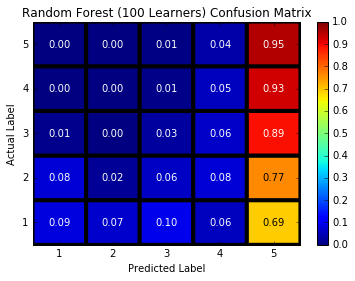

In [83]:
random_forest_confusion_matrix = confusion_matrix(test_stars, forest100_pred)
plot_confusion_matrix(random_forest_confusion_matrix, 'Random Forest (100 Learners) Confusion Matrix',savefilename='RandomForestCM.png')

In [14]:
def print_classifier_performance_metrics(name, predictions):
    target_names = ['1 star', '2 star', '3 star', '4 star', '5 star']
    
    print("MODEL: %s" % name)
    print()

    print('Precision: ' + str(metrics.precision_score(test_stars, predictions))) 
    print('Recall: ' + str(metrics.recall_score(test_stars, predictions))) 
    print('F1: ' + str(metrics.f1_score(test_stars, predictions)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_stars, predictions)))

    print()
    print('Classification Report:') 
    print(classification_report(test_stars, predictions, target_names=target_names)) 
    
    print()
    print('Precision variance: %f' % np.var(precision_score(test_stars, predictions, average=None), ddof=len(target_names)-1)) 
    
    print()
    print('Recall variance: %f' % np.var(recall_score(test_stars, predictions, average=None), ddof=len(target_names)-1)) 

In [84]:
print_classifier_performance_metrics('Random Forest (100 Learners)', forest100_pred)

MODEL: Random Forest (100 Learners)

Precision: 0.443755089129
Recall: 0.52889682135
F1: 0.406994962842
Accuracy: 0.52889682135

Classification Report:
             precision    recall  f1-score   support

     1 star       0.19      0.09      0.12       188
     2 star       0.17      0.02      0.04       379
     3 star       0.22      0.03      0.05      1117
     4 star       0.38      0.05      0.10      3842
     5 star       0.54      0.95      0.69      6240

avg / total       0.44      0.53      0.41     11766


Precision variance: 0.102011

Recall variance: 0.660701


C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sam

In [85]:
multinomial_nb_classifier = MultinomialNB()
multinomial_nb_classifier.fit(train_review, train_stars)
multinomial_nb_prediction = multinomial_nb_classifier.predict(test_review) 

[[  9.78723404e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    2.12765957e-02]
 [  9.34036939e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    6.59630607e-02]
 [  8.46016115e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.53983885e-01]
 [  7.55075482e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    2.44924518e-01]
 [  6.75641026e-01   1.60256410e-04   0.00000000e+00   0.00000000e+00
    3.24198718e-01]]


C:\Software\Anaconda3\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


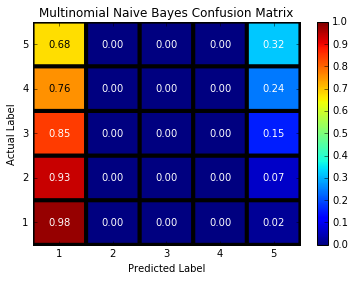

In [87]:
multinomial_confusion_matrix = confusion_matrix(test_stars, multinomial_nb_prediction)
print(make_confusion_matrix_relative(multinomial_confusion_matrix))
plot_confusion_matrix(multinomial_confusion_matrix,'Multinomial Naive Bayes Confusion Matrix', savefilename='MultinomialCM.png')

In [88]:
print_classifier_performance_metrics('Multinomial Naive Bayes', multinomial_nb_prediction)

MODEL: Multinomial Naive Bayes

Precision: 0.3393248563
Recall: 0.18757436682
F1: 0.228820328548
Accuracy: 0.18757436682

Classification Report:
             precision    recall  f1-score   support

     1 star       0.02      0.98      0.04       188
     2 star       0.00      0.00      0.00       379
     3 star       0.00      0.00      0.00      1117
     4 star       0.00      0.00      0.00      3842
     5 star       0.64      0.32      0.43      6240

avg / total       0.34      0.19      0.23     11766


Precision variance: 0.321735

Recall variance: 0.723483


C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None 

In [94]:
from operator import itemgetter
from functools import reduce

def argmax(dictionary):
    return (max(dictionary.items(), key=itemgetter(1)))[0]

class Multinomial_NB_Classifier():
    
    def train(self, class_labels, documents, class_priors=[], complement=False):       
        Classes = sorted(list(set(class_labels)))
        Vocabulary = reduce(lambda V, d : V.union(set(d.split())), documents, set())
        
        if len(class_priors) != len(Classes):
            N_documents_per_class = lambda c : sum(c == np.array(class_labels))
            N_documents = len(documents)
            class_priors = {c : N_documents_per_class(c) / float(N_documents) for c in Classes}
        
        Text_given_class = {c : documents[c == np.array(class_labels)].sum() for c in Classes}
        length_of_concatenated_documents_of_class = {c : len(Text_given_class[c].split()) for c in Classes}
        total_length_of_concatenated_documents_of_all_classes = sum([length_of_concatenated_documents_of_class[C] for C in Classes])
        
        absolute_frequency_vectorizer = CountVectorizer(analyzer = "word",
                                                        vocabulary = Vocabulary,
                                                        ngram_range = (1, 1),
                                                        binary = False)
        documentclass_termunigram_matrix = absolute_frequency_vectorizer.fit_transform(Text_given_class.values())
    
        number_of_feature_words = documentclass_termunigram_matrix.shape[1]
        feature_word_index = dict(zip(absolute_frequency_vectorizer.get_feature_names(), range(number_of_feature_words)))
        word_counts_irregardless_of_class = documentclass_termunigram_matrix.sum(axis=0)
        
        WORD_GIVEN_CLASS_CPT = {}
        COMPLEMENT_WORD_GIVEN_CLASS_CPT = {}
        K = len(Vocabulary)
        
        for class_idx, c in enumerate(Classes):
            if c not in WORD_GIVEN_CLASS_CPT:
                WORD_GIVEN_CLASS_CPT[c] = {}
                COMPLEMENT_WORD_GIVEN_CLASS_CPT[c] = {}

            for w in Vocabulary:
                T_wc = documentclass_termunigram_matrix[class_idx, feature_word_index[w]]
                WORD_GIVEN_CLASS_CPT[c][w] = float(1 + T_wc) / (K + length_of_concatenated_documents_of_class[c])
                
                C_wc = word_counts_irregardless_of_class[0, feature_word_index[w]] - T_wc
                complement_classes_wc = total_length_of_concatenated_documents_of_all_classes-length_of_concatenated_documents_of_class[c]
                COMPLEMENT_WORD_GIVEN_CLASS_CPT[c][w] = float(1 + C_wc) / (K + complement_classes_wc)
           
        self.classes = Classes
        self.vocabulary = Vocabulary
        self.class_priors = class_priors
        self.words_cpt = WORD_GIVEN_CLASS_CPT
        
        if complement:
            self.complement = True
            self.complement_cpt = COMPLEMENT_WORD_GIVEN_CLASS_CPT
        else:
            self.complement = False
            
        return self

    def predict(self, documents):
        target_labels = []
        
        for d in documents:
            score = {}
            Words_d = set(d.split())
            
            for class_idx, c in enumerate(self.classes):
                word_log_likelihoods = np.log([self.words_cpt[c][w] for w in Words_d if w in self.vocabulary])
                score[c] = np.log(self.class_priors[c])
                
                if self.complement:
                    word_in_complement_classes_log_likelihoods = np.log([self.complement_cpt[c][w] for w in Words_d if w in self.vocabulary])
                    score[c] -= sum(word_in_complement_classes_log_likelihoods)
                else:
                    score[c] += sum(word_log_likelihoods)
                    
            c_map = argmax(score)
            target_labels.append(c_map)
            
        return target_labels    

In [95]:
%time clf = Multinomial_NB_Classifier().train(class_labels=train_stars, documents=train_review, complement=True)

AttributeError: 'Series' object has no attribute 'split'

In [92]:
%time pre = clf.predict(test_review)

NameError: name 'clf' is not defined

In [ ]:
my_multinomial_confusion_matrix = confusion_matrix(test_y, pre)
plot_confusion_matrix(my_multinomial_confusion_matrix,'My Multinomial Naive Bayes Confusion Matrix', savefilename='MyMultinomialCM.png')

In [ ]:
print_classifier_performance_metrics('My Multinomial Naive Bayes', pre)

In [144]:
N = 10
vocab = np.array([t for t, i in sorted(bag_of_words_vectorizer.vocabulary_.items(), key=itemgetter(1))])

for i, label in enumerate(sorted(set(train_y))):
    top_n_features_indices = np.argsort(multinomial_nb_classifier.coef_[i])[-N:]
    print("\nThe top %d most informative features for star category %d: \n%s" % (N, label, ", ".join(vocab[top_n_features_indices]))) 


The top 10 most informative features for star category 1: 
time, price, back, dont, taco, good, place, food, buffet, nan

The top 10 most informative features for star category 2: 
time, back, dont, place, taco, line, good, nan, food, buffet

The top 10 most informative features for star category 3: 
line, time, great, servic, taco, place, buffet, food, good, nan

The top 10 most informative features for star category 4: 
meat, time, great, buffet, order, taco, place, food, good, nan

The top 10 most informative features for star category 5: 
servic, order, time, vega, great, good, place, food, taco, nan


In [145]:
N = 10
vocab = np.array([t for t, i in sorted(bigram_vectorizer.vocabulary_.items(), key=itemgetter(1))])

for i, label in enumerate(sorted(set(train_y))):
    top_n_features_indices = np.argsort(bigram_multinomial_nb_classifier.coef_[i])[-N:]
    print("\nThe top %d most informative features for star category %d: \n%s" % (N, label, ", ".join(vocab[top_n_features_indices])))


The top 10 most informative features for star category 1: 
worst buffet, wait minut, wast money, save money, ice cream, wast time, hometown buffet, al pastor, dont wast, crab leg

The top 10 most informative features for star category 2: 
line minut, order taco, carn asada, ice cream, la vega, wait line, cotton candi, buffet buffet, prime rib, crab leg

The top 10 most informative features for star category 3: 
spici pork, buffet harrah, buffet buffet, food good, ice cream, cotton candi, carn asada, prime rib, pretti good, crab leg

The top 10 most informative features for star category 4: 
food good, el gordo, taco el, fish chip, boil peanut, spici pork, crab leg, island style, meat jun, carn asada

The top 10 most informative features for star category 5: 
back nan, great servic, boil peanut, island style, taco el, spici pork, el gordo, carn asada, meat jun, la vega


In [146]:
import json
from collections import OrderedDict
 
def convert_json_dict_string_to_python_dict(json_string_dict):
    return json.loads(json_string_dict.replace('\'', '"').replace('u"', '"'))

def get_number_of_review_votes_that_are(cool_or_funny_or_useful):
    assert cool_or_funny_or_useful in ['cool', 'funny', 'useful']
    return lambda review_votes_dict : review_votes_dict[cool_or_funny_or_useful]

def get_total_review_votes(review_votes_dict):
    return review_votes_dict['cool'] + review_votes_dict['funny'] + review_votes_dict['useful']

def get_number_of_compliments_that_are(cool_or_cute_or_funny_or_hot_or_list_or_more_or_note_or_photos_or_plain_or_profile_or_writer):
    key = cool_or_cute_or_funny_or_hot_or_list_or_more_or_note_or_photos_or_plain_or_profile_or_writer
    assert cool_or_cute_or_funny_or_hot_or_list_or_more_or_note_or_photos_or_plain_or_profile_or_writer in [u'cool',u'cute', u'funny', u'list',u'more', u'note',u'photos',u'plain', u'profile',u'writer']
    return lambda compliments_dict : compliments_dict[key] if key in compliments_dict else 0

def count_number_of_positive_words(document):
    return (filter(lambda tok : tok in POSITIVE_WORDS, document))

def count_number_of_negative_words(document):
    return (filter(lambda tok : tok in NEGATIVE_WORDS, document))

def check_that_userid_does_not_appear_in_its_friendid_list(df):
    for i, x in df.iterrows():
        d = OrderedDict(x)
        assert d['business_id'] not in d['friends_id_list']

def get_average_friends_average_stars(df):
    
    def apply_func(friend_user_id_list):
        friend_ids_that_exist_in_df = set(df['user_id']).intersection(set(friend_user_id_list))
        indices_of_records_with_friend_ids = df['user_id'].isin(friend_ids_that_exist_in_df)
        userid_and_averagestars_df = df[['user_id', 'user_average_stars']]
        friends_average_stars_indexed_by_userid_df = userid_and_averagestars_df.loc[indices_of_records_with_friend_ids].groupby('user_id').mean()
        return np.mean(friends_average_stars_indexed_by_userid_df['user_average_stars'])
    
    return apply_func

In [159]:
TURBO_DF.text

0       Friendly people, friendly bartenders. good atm...
1       Awesome. Was greeted when we came in, the staf...
2       Nu towne is the place that my roomies and I ab...
3       This place is the deal great drinks atmosphere...
4       The history, the people, the license plates......
5       What a perfect location for Nu Towne Saloon. W...
6       My review would be from 1973. Everyone was fri...
7       LOTS of cock sucking, ass eating and cum swapp...
8       This is been one of the best bars in town for ...
9       Any place that plays Sunshine Day by the Brady...
10      So I just moved to town. I was told to go to N...
11      Wow why had I never been here before ! The old...
12      I love you, NuTowne! The dirt lot. The endless...
13      My first apartment in Phx was at Van Buren and...
14      What a refreshing alternative to Charlie's. So...
15      Truely one of Americas greatest gay bars!!! Ye...
16      When in Phoenix, this is a place that I love t...
17      I don'

In [160]:
df_with_initial_features_and_preprocessed_review_text.text 

0       <filter object at 0x00000276EDC3D6A0>
1       <filter object at 0x00000276E909BB00>
2       <filter object at 0x00000276ED74E400>
3       <filter object at 0x00000276ED74E278>
4       <filter object at 0x00000276EBB9B7B8>
5       <filter object at 0x00000276EC258390>
6       <filter object at 0x00000276EC258978>
7       <filter object at 0x00000276EC24A5C0>
8       <filter object at 0x00000276EC2544E0>
9       <filter object at 0x00000276EC254C50>
10      <filter object at 0x00000276EBD3B358>
11      <filter object at 0x00000276EBD19048>
12      <filter object at 0x00000276EBD286A0>
13      <filter object at 0x00000276EBD1DA90>
14      <filter object at 0x00000276EBD40DA0>
15      <filter object at 0x00000276EBD49E80>
16      <filter object at 0x00000276EC75C208>
17      <filter object at 0x00000276EC754A90>
18      <filter object at 0x00000276EC743048>
19      <filter object at 0x00000276EC743438>
20      <filter object at 0x00000276EC7676D8>
21      <filter object at 0x000002

In [149]:
df_with_refeature_engineered = df_with_initial_features_and_preprocessed_review_text
df_with_refeature_engineered['review_length'] = df_with_refeature_engineered.text.apply(len)
df_with_refeature_engineered['user_id'] = TURBO_DF.user_id
df_with_refeature_engineered['user_review_count'] = TURBO_DF.user_review_count
df_with_refeature_engineered['user_average_stars'] = TURBO_DF.average_stars
df_with_refeature_engineered['business_stars'] = TURBO_DF.review_stars

df_with_initial_features_and_preprocessed_review_text.text.apply(count_number_of_positive_words)
#df_with_refeature_engineered['negative_words_count'] = df_with_initial_features_and_preprocessed_review_text.text.apply(count_number_of_negative_words)
#df_with_refeature_engineered['neutral_words_count'] = df_with_refeature_engineered.review_length - (df_with_refeature_engineered.positive_words_count + df_with_refeature_engineered.negative_words_count)
#df_with_refeature_engineered['positive_words_count_over_review_length'] = df_with_refeature_engineered.positive_words_count / (1.0*df_with_refeature_engineered.review_length)
#df_with_refeature_engineered['negative_words_count_over_review_length'] = df_with_refeature_engineered.negative_words_count / (1.0*df_with_refeature_engineered.review_length)
#df_with_refeature_engineered['neutral_words_count_over_review_length'] = df_with_refeature_engineered.neutral_words_count / (1.0*df_with_refeature_engineered.review_length)
#df_with_refeature_engineered['positive_to_negative_words_count_ratio'] = df_with_refeature_engineered.positive_words_count / (1.0*df_with_refeature_engineered.negative_words_count)
#df_with_refeature_engineered['negative_to_positive_words_count_ratio'] = df_with_refeature_engineered.negative_words_count / (1.0*df_with_refeature_engineered.positive_words_count)


C:\Software\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Software\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Software\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

0       <filter object at 0x00000276EBF2A898>
1       <filter object at 0x00000276EBF6C9B0>
2       <filter object at 0x00000276EBF6CE80>
3       <filter object at 0x00000276EC0C5630>
4       <filter object at 0x00000276EC0C51D0>
5       <filter object at 0x00000276EC0C50B8>
6       <filter object at 0x00000276EC0C57B8>
7       <filter object at 0x00000276EC0C56A0>
8       <filter object at 0x00000276EC0C5CF8>
9       <filter object at 0x00000276EC0C5668>
10      <filter object at 0x00000276EC0C5AC8>
11      <filter object at 0x00000276EC0C5B00>
12      <filter object at 0x00000276EC0C55C0>
13      <filter object at 0x00000276EC0C5E48>
14      <filter object at 0x00000276EC0C57F0>
15      <filter object at 0x00000276EC0C55F8>
16      <filter object at 0x00000276EC0C5860>
17      <filter object at 0x00000276E90DDA90>
18      <filter object at 0x00000276E90DD8D0>
19      <filter object at 0x00000276E90DD828>
20      <filter object at 0x00000276E90DD208>
21      <filter object at 0x000002

In [53]:
corr_features = ['review_cool', 'review_funny', 'review_useful', 'review_votes_count', 'review_length',
                 'business_review_count','user_cool', 'user_funny', 'user_useful', 'user_votes_count', 'user_review_count', 'user_fans',
                 'user_friends_count', 'user_years_elite_count', 'user_compliments_cool', 'user_compliments_cool','user_compliments_cute', \
                 'user_compliments_funny', 'user_compliments_hot', 'user_compliments_list','user_compliments_more', \
                 'user_compliments_note', 'user_compliments_photos', 'user_compliments_plain','user_compliments_profile', \
                 'user_compliments_writer','positive_words_count', 'negative_words_count', 'positive_to_negative_words_count_ratio',
                 'negative_to_positive_words_count_ratio', 'neutral_words_count', 'neutral_words_count_over_review_length',
                 'positive_words_count_over_review_length', 'negative_words_count_over_review_length', 'friends_average_stars',
                 'user_average_stars', 'business_stars', 'review_stars']
Corr_df = df_with_refeature_engineered[corr_features].corr()
Corr_df

KeyError: "['review_cool' 'review_funny' 'review_useful' 'review_votes_count'\n 'review_length' 'business_review_count' 'user_cool' 'user_funny'\n 'user_useful' 'user_votes_count' 'user_review_count' 'user_fans'\n 'user_friends_count' 'user_years_elite_count' 'user_compliments_cool'\n 'user_compliments_cool' 'user_compliments_cute' 'user_compliments_funny'\n 'user_compliments_hot' 'user_compliments_list' 'user_compliments_more'\n 'user_compliments_note' 'user_compliments_photos' 'user_compliments_plain'\n 'user_compliments_profile' 'user_compliments_writer'\n 'positive_words_count' 'negative_words_count'\n 'positive_to_negative_words_count_ratio'\n 'negative_to_positive_words_count_ratio' 'neutral_words_count'\n 'neutral_words_count_over_review_length'\n 'positive_words_count_over_review_length'\n 'negative_words_count_over_review_length' 'friends_average_stars'\n 'user_average_stars' 'business_stars'] not in index"

In [54]:
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *

def triangularize_symmetric_matrix(x, y, z):
    x_new = x[0:-1]
    y_new = y[-1:0:-1]
    tmp = np.empty(z.shape)
    tmp.fill(np.nan)
    for i in range(len(z)):
        tmp[i, 0 :i] = z[i, 0:i]
    tmp = np.flipud(tmp)
    z_new = tmp
    return (x_new, y_new, z_new)

ImportError: No module named 'plotly'

In [55]:
py.sign_in('kevin11h', 'ilrcfqwrng')

(x, y, z) = triangularize_symmetric_matrix(corr_features,
                                           corr_features,
                                           Corr_df.as_matrix())

trace = Heatmap(z=z,
                x=x,
                y=y,
                zauto=False,
                zmax = 1,
                zmin = -1,
                colorscale=[[-1,'#3333CC'], [0, '#CC00CC'], [1, '#CC0000']],
                reversescale=True,
                colorbar=ColorBar(titleside='bottom',
                                  title='   %f'%-1))

data = Data([trace])

title = 'Feature Correlations of Yelp Reviews'
data_src_url = 'http://www.yelp.com/dataset_challenge'
annotation_text = 'Source and for more information: <a href="%s">Yelp Dataset Challenge</a>' % data_src_url

layout = Layout(title=title,
                autosize=False,
                height=500,
                width=600,
                annotations=Annotations([Annotation(text=annotation_text,
                                         xref='paper',
                                         yref='paper',
                                         xanchor='right',
                                         yanchor='bottom',
                                         x=.75,
                                         y=1)])
                )
axis_style = {'autotick':False,'showgrid':False,'showline':False}
layout.update(xaxis=XAxis(axis_style, tickangle=90))
layout.update(yaxis=YAxis(axis_style))

fig = Figure(data=data, layout=layout)

url = py.plot(fig, filename='yelp_feature_correlations', auto_open=False)
print(url)
py.iplot(fig, filename='yelp_feature_correlations')

NameError: name 'py' is not defined

In [56]:
factors_affecting_review_stars_sorted_by_corr = sorted(zip(Corr_df.index, Corr_df['review_stars']), \
                                                       key = lambda factor_corr_pair : np.abs(factor_corr_pair[1]), reverse=True)
series_of_factors_affecting_review_stars_sorted_by_corr = Series(OrderedDict(factors_affecting_review_stars_sorted_by_corr))
series_of_factors_affecting_review_stars_sorted_by_corr

NameError: name 'Corr_df' is not defined

In [57]:
df_with_refeature_engineered.positive_words_count_over_review_length.describe()

AttributeError: 'DataFrame' object has no attribute 'positive_words_count_over_review_length'

In [104]:
df_with_refeature_engineered['negative_words_count_over_review_length'].describe()

KeyError: 'negative_words_count_over_review_length'

In [105]:
def multiply_negative_words(by=1):
    def apply_func(document=''):
        negative_words = filter(lambda s : s in NEGATIVE_WORDS, document.split())
        return document + ' ' + ' '.join(negative_words * (by-1))
    return apply_func

In [107]:
negativity_factor = 10
m  = multiply_negative_words(negativity_factor)
df_with_refeature_engineered_and_preprocessed_review_text = TURBO_DF[initial_features]
df_with_refeature_engineered_and_preprocessed_review_text['overly_negative_review_text'] = TURBO_DF.review_text.apply(m)
%time df_with_refeature_engineered_and_preprocessed_review_text.overly_negative_review_text \
= df_with_refeature_engineered_and_preprocessed_review_text.overly_negative_review_text\
.apply(lowercase_remove_punctuation_and_numbers_and_tokenize_and_filter_more_stopwords_and_stem_and_restring)

for idx in range(5):
    print(df_with_refeature_engineered_and_preprocessed_review_text.overly_negative_review_text[idx])
    print

TypeError: unsupported operand type(s) for *: 'filter' and 'int'

In [108]:
train_X, test_X, train_y, test_y = train_test_split(df_with_refeature_engineered_and_preprocessed_review_text.overly_negative_review_text,
                                                    df_with_refeature_engineered_and_preprocessed_review_text.review_stars,
                                                    test_size=TEST_SIZE,
                                                    random_state=42)

AttributeError: 'DataFrame' object has no attribute 'overly_negative_review_text'